In [1]:
from fast_rl.agents.dqn import create_dqn_model, dqn_learner
from fast_rl.agents.dqn_models import *
from fast_rl.agents.dqn import *
from fast_rl.core.agent_core import ExperienceReplay, PriorityExperienceReplay,  GreedyEpsilon
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.metrics import RewardMetric, EpsilonMetric
from fastai.gen_doc.nbdoc import show_doc
from fast_rl.core.train import GroupAgentInterpretation, AgentInterpretation
from fastai.basic_data import DatasetType

Can't import one of these: No module named 'pybullet'
Can't import one of these: No module named 'gym_maze'
Can't import one of these: No module named 'gym_minigrid'


## Databunch for Training / Validation
For reinforcement learning, training might take a long time.

Note that if you want to avoid validation running, just turn it off and reflect the change in 
the interpretation objects. The agent will train much faster, and then you could validate later.
```python
data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', add_valid=False, bs=128)
AgentInterpretation(learn=learn, ds_type=DatasetType.Train)
```

In [2]:
data = MDPDataBunch.from_env('CartPole-v1', render='human', bs=64, add_valid=False)

In [3]:
show_doc(DQNModule.__init__)

<h4 id="DQNModule.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#DQNModule-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`ni`**:`int`, **`ao`**:`int`, **`layers`**:`Collection`\[`int`\], **`discount`**:`float`=***`0.99`***, **`lr`**=***`0.001`***, **`n_conv_blocks`**:`Collection`\[`int`\]=***`0`***, **`nc`**=***`3`***, **`opt`**=***`None`***, **`emb_szs`**:`ListSizes`=***`None`***, **`loss_func`**=***`None`***, **`w`**=***`-1`***, **`h`**=***`-1`***, **`ks`**:`Union`\[`NoneType`, `list`\]=***`None`***, **`stride`**:`Union`\[`NoneType`, `list`\]=***`None`***, **`grad_clip`**=***`5`***, **`conv_kern_proportion`**=***`0.1`***, **`stride_proportion`**=***`0.1`***, **`pad`**=***`False`***, **`batch_norm`**=***`False`***)

<div class="collapse" id="DQNModule-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DQNModule-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Basic DQN Module. Args:
        ni: Number of inputs. Expecting a flat state `[1 x ni]`
        ao: Number of actions to output.
        layers: Number of layers where is determined per element.
        n_conv_blocks: If `n_conv_blocks` is not 0, then convolutional blocks will be added
                                   to the head on top of existing linear layers.
        nc: Number of channels that will be expected by the convolutional blocks. 

In [4]:
show_doc(BaseDQNTrainer.__init__)
show_doc(BaseDQNTrainer.on_loss_begin)

<h4 id="BaseDQNTrainer.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#BaseDQNTrainer-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`learn`**:`DQNLearner`, **`max_episodes`**=***`None`***)

<div class="collapse" id="BaseDQNTrainer-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#BaseDQNTrainer-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Handles basic DQN end of step model optimization.  

<h4 id="BaseDQNTrainer.on_loss_begin" class="doc_header"><code>on_loss_begin</code><a class="source_link" data-toggle="collapse" data-target="#BaseDQNTrainer-on_loss_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_loss_begin</code>(**\*\*`kwargs`**:`Any`)

<div class="collapse" id="BaseDQNTrainer-on_loss_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#BaseDQNTrainer-on_loss_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_loss_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Performs tree updates, exploration updates, and model optimization.  

The batch size will be defined in the data class because `DataBunches` already require a 
batch size input. This batch size will be used by the model during optimization.

## Experience Replay

In [5]:
memory = ExperienceReplay(memory_size=1000000, reduce_ram=True)
explore = GreedyEpsilon(epsilon_start=1, epsilon_end=0.1, decay=0.001)
model = create_dqn_model(data=data, base_arch=DQNModule, lr=0.001, layers=[32,32], opt=optim.RMSprop)
learn = dqn_learner(data, model, memory=memory, exploration_method=explore, 
                    callback_fns=[RewardMetric, EpsilonMetric])
learn.fit(3)

epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.115965,#na#,81.000000,0,0.930805,00:01
1,1.038706,#na#,34.000000,0,0.903032,00:00
2,1.015652,#na#,28.000000,0,0.880859,00:00


In [6]:
interp = AgentInterpretation(learn, ds_type=DatasetType.Train)

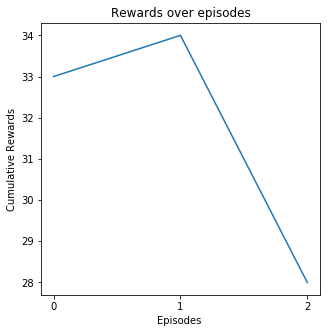

In [7]:
interp.plot_rewards(cumulative=True, per_episode=True, group_name='er_rms')

We can also pipe-line this to truly see how our model actually performs.

In [8]:
group_interp = GroupAgentInterpretation()
group_interp.add_interpretation(interp)
for i in range(5):
    data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=32, add_valid=False)
    model = create_dqn_model(data=data, base_arch=DQNModule, lr=0.001, layers=[32,32], opt=optim.RMSprop)
    memory = ExperienceReplay(memory_size=1000000, reduce_ram=True)
    explore = GreedyEpsilon(epsilon_start=1, epsilon_end=0.1, decay=0.001)
    learn = dqn_learner(data, model, memory=memory, exploration_method=explore, 
                        callback_fns=[RewardMetric, EpsilonMetric])
    learn.fit(3)
    interp = AgentInterpretation(learn, ds_type=DatasetType.Train)
    interp.plot_rewards(cumulative=True, per_episode=True, group_name='er_rms', no_show=True)
    group_interp.add_interpretation(interp)
    group_interp.to_pickle('data/dqn', 'dqn_er_rms')
    data.close()

epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.008142,#na#,59.000000,0,0.949285,00:00
1,0.989493,#na#,45.000000,0,0.911914,00:00
2,0.986075,#na#,9.000000,0,0.904640,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.064199,#na#,48.000000,0,0.958679,00:00
1,1.001141,#na#,78.000000,0,0.894247,00:01
2,0.995415,#na#,21.000000,0,0.877742,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.072950,#na#,40.000000,0,0.965576,00:00
1,1.025644,#na#,24.000000,0,0.945049,00:00
2,1.016994,#na#,13.000000,0,0.934135,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.130652,#na#,35.000000,0,0.969914,00:00
1,1.034882,#na#,22.000000,0,0.950985,00:00
2,1.006739,#na#,26.000000,0,0.929145,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.125571,#na#,41.000000,0,0.964710,00:00
1,1.070065,#na#,15.000000,0,0.951837,00:00
2,1.049187,#na#,15.000000,0,0.939154,00:00


Below are runs produced by `test_dqn.py`

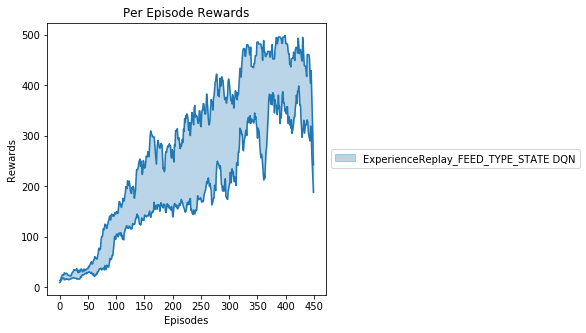

In [9]:
group_interp = GroupAgentInterpretation.from_pickle('data/cartpole_dqn', 'dqn_ExperienceReplay_FEED_TYPE_STATE')
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

In [10]:
[g.analysis for g in group_interp.groups]

[{'average': 235.88644444444444, 'max': 499.0, 'min': 10.8, 'type': 'reward'},
 {'average': 209.4431111111111, 'max': 446.1, 'min': 10.0, 'type': 'reward'},
 {'average': 272.5126666666667, 'max': 495.9, 'min': 11.5, 'type': 'reward'},
 {'average': 246.3011111111111, 'max': 431.1, 'min': 10.1, 'type': 'reward'},
 {'average': 200.82066666666665, 'max': 493.3, 'min': 14.0, 'type': 'reward'}]

## Priority Experience Replay

Another form of experience is Priority Experience Replay (PER). You will notice it does not perform as well. This is because PER usually does better after around a sample size of 1,000,000. 

In [11]:
per_group_interp = GroupAgentInterpretation()
per_group_interp.add_interpretation(interp)
for i in range(4):
    data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=32)
    model = create_dqn_model(data=data, base_arch=DQNModule, lr=0.001, layers=[32,32], opt=optim.RMSprop)
    memory = PriorityExperienceReplay(memory_size=1000000, reduce_ram=True)
    explore = GreedyEpsilon(epsilon_start=1, epsilon_end=0.1, decay=0.001)
    learn = dqn_learner(data, model, memory=memory, exploration_method=explore, 
                        callback_fns=[RewardMetric, EpsilonMetric])
    learn.fit(3)
    interp = AgentInterpretation(learn, ds_type=DatasetType.Train)
    interp.plot_rewards(cumulative=True, per_episode=True, group_name='per_rms', no_show=True)
    per_group_interp.add_interpretation(interp)
    group_interp.to_pickle('data/dqn', 'dqn_per')
    data.close()

epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,0.985953,0.978167,34.000000,11.000000,0.970785,00:00
1,0.962964,0.938855,13.000000,9.000000,0.959538,00:00
2,1.033143,1.108634,14.000000,12.000000,0.947588,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.158426,1.081190,34.000000,13.000000,0.970785,00:00
1,1.016505,0.964204,18.000000,14.000000,0.955251,00:00
2,0.983167,0.917293,12.000000,11.000000,0.945049,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,0.977745,0.956055,34.000000,13.000000,0.970785,00:00
1,0.907634,0.846010,16.000000,10.000000,0.956963,00:00
2,0.948602,1.009438,12.000000,11.000000,0.946741,00:00


epoch,train_loss,valid_loss,train_reward,valid_reward,epsilon,time
0,1.037319,1.009864,37.000000,25.000000,0.968176,00:00
1,1.008467,0.999334,19.000000,15.000000,0.951837,00:00
2,0.964588,0.892831,27.000000,11.000000,0.929145,00:00


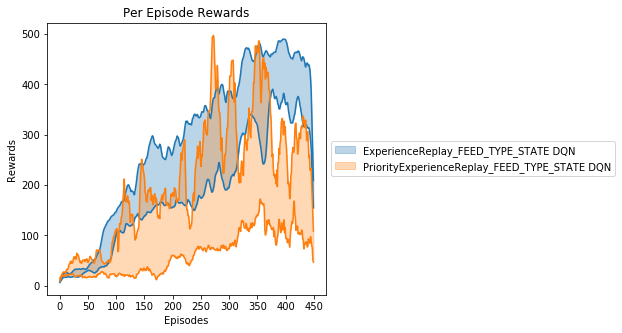

In [12]:
per_group_interp = GroupAgentInterpretation.from_pickle('data/cartpole_dqn', 'dqn_PriorityExperienceReplay_FEED_TYPE_STATE')
per_group_interp.add_interpretation(group_interp)
per_group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

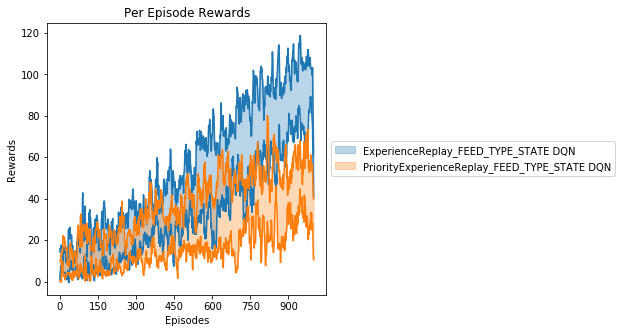

In [13]:
per_group_interp = GroupAgentInterpretation.from_pickle('data/lunarlander_dqn', 'dqn_ExperienceReplay_FEED_TYPE_STATE')
per_group_interp.add_interpretation(
    GroupAgentInterpretation.from_pickle('data/lunarlander_dqn', 'dqn_PriorityExperienceReplay_FEED_TYPE_STATE')
)
per_group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAm4AAAFNCAYAAAC5eOMWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydd3wUdf7/X++Z2d10SEIIoYTQQygicGLH3vHAfqenp8J99c52lq/t+1PPr3p66tfT8/zaFc5yonhiL/hVDrGC9N5LICSB9GTLzHx+f0zZ2dnZZBMSQsL76SMPZmdnZj+zMZtXXu9GQggwDMMwDMMwBz9SZy+AYRiGYRiGSQ4WbgzDMAzDMF0EFm4MwzAMwzBdBBZuDMMwDMMwXQQWbgzDMAzDMF0EFm4MwzAMwzBdBBZuzEEDEV1KRJ+38zWLiEgQkdKe1z2YIKITiGhnZ6+DYRiG6XhYuB2CENFWImoionoi2kNErxBRRjtd+z4iipjXtr6qkzlXCPG6EOK09lhHe+C6l2oi+paIjursdTEMwzCHLizcDl2mCCEyAIwH8AsA/9XaCzTjYr0lhMhwfPXcn4V2Mm+Z71MvAF8BeLszF9OdnUOGYRimZVi4HeIIIUoBfAJgNAAQUQ8ieomIdhNRKRE9QESy+dxviWghET1BRPsA3Nfa1zPDljcQ0WYiqiSiR4lIclz/G3ObzNcpJ6IaIlpORM41ziKiCiLaRkT/5biGTESPmdfeDOBs1+snvL8W3icVwOsA+hFRnuN65xDRUocjN9bcfyURfeA4biMRzXY83kFE48ztJ83HtUS0mIiOcxx3HxG9Q0SvEVEtgN8SUSoRvUpEVUS0Gobwdt7j7ea91RHROiI6OclvD8MwDHOQw3+9H+IQ0QAAZwF419w1E8AeAEMBpAP4EMAOAM+Zz08C8E8AvQH42viy0wBMBJABYB6AdQBedB1zGoDjAQwHUAOgGIAVcv0bgB4ABgPIBfA5gN0AXgIwA8A5AA4H0ABgjuu6Ld2fJ0TkB3A5gL0Aqsx94wG8DGAKgEUALgPwPhGNADAfwBOmoMyH8V4dY5432Lz35eblfwJwv3mfNwJ4m4iKhBBB8/lfArjQfP0AgHsBDDG/0mEIb2udIwBcB+AXQohdRFQEoEVhyjAMw3QN2HE7dHnPzD37BobIeIiI8gGcCeAmIUSDEKIcwBMALnGct0sI8TchhCqEaEpw7YtMB8r6+sr1/CNCiH1CiO0A/grgVx7XiADIhCHYSAixRgix23THLgZwpxCiTgixFcDjAH5jvTaAvwohdggh9gH4s3XBJO/P814ANMEQhReY7hvMx88JIX4QQmhCiJkAQgCOFEJsBlAHYByAyQA+A1BKRMXm4wVCCB0AhBCvCSH2mu/p4zDE2QjHGr4TQrwnhNDN9/wiAA+a7+EOAE85jtXM80uIyCeE2CqE2NTM/TEMwzBdCHbcDl2mCiHmOXcQ0RgYztBuIrJ2SzAcKQvndiJmCyEua+Z55zW2AejrPkAI8X9E9DSAvwMoJKJ/AbgVQCoAv3me8xr9zO2+Hte3GIiW78/zXoioFwz3bgKArx3Xu4KIrncc73fcz3wAJ8Bw9+bDcAwnAzjKfAwAIKJbAEw3zxMAsmDk1Fm415fwHoUQG4noJhhh7FFE9BmAm4UQu5q5R4ZhGKaLwI4b42QHDMeolxCip/mVJYQY5ThGtMPrDHBsFwLwFBVCiKeEEBMAjIIRMr0NQCUMN26g6xql5vZuj+tbJHN/ngghKgH8B4D7iKjAcb0HHdfqKYRIE0K8aT5vCbfjzO35MITbZHMbZj7b7TBctGyzkKMGgK0sEf+eN3ePEEK8IYQ4FsZ7JAA80tL9MQzDMF0DFm6MjRBiN4x8sceJKIuIJCIaQkST2/mlbiOibDO/7kYAb7kPIKJfENEkIvLByFULAtCEEBqA2QAeJKJMIhoI4GYAr5mnzgZwAxH1J6JsAHe01/0JIdbCCHn+p7nrBQDXmOskIkonorOJKNN8fj6AEwGkCiF2AlgA4AwYeXlLzGMyAagAKgAoRHQPDMetOWYDuNN8D/sDsB0/IhpBRCcRUcB8z5pghE8ZhmGYbgALN8bN5TDCfathJOG/A6Cg2TPiuZhi+7jVE1Fvx/NzASwGsBTARzCKCtxkwRBGVTBCgXsBPGY+dz0MMbcZRo7eGzCKBGCe8xmAZQB+RrToor3u71EAvyOi3kKIRTDy3J42r7URwG+tA4UQ6wHUwxBsEELUmmteaApQmGv9BMB68z6DaDkc/Sfz2C0whOg/HM8FADwMw5ksg1FEclcr7o9hGIY5iCEh2iPyxTDJQUQCwDAhxMbOXgvDMAzDdDXYcWMYhmEYhukisHBjGIZhGIbpInColGEYhmEYpovAjhvDMAzDMEwXgYUbwzAMwzBMF6FLT07o1auXKCoq6uxlMAzTzVi8eHGlECKvs9fBMAzjpksLt6KiIixatKizl8EwTDeDiLa1fBTDMMyBh0OlDMMwDMMwXQQWbgzDMAzDMF0EFm4MwzAMwzBdBBZuDMMwDMMwXYQOE25E9DIRlRPRSse+R4loLREtJ6J/EVFPx3N3EtFGIlpHRKd31LoYhmEYhmG6Kh3puL0K4AzXvi8AjBZCjAWwHsCdAEBEJQAuATDKPOcZIpI7cG0MwzAMwzBdjg4TbkKIfwPY59r3uRBCNR9+D6C/uf1LAP8UQoSEEFsAbARwREetjWEYhmEYpivSmTluVwH4xNzuB2CH47md5j6GYRiGYRjGpFOEGxHdDUAF8Lq1y+MwkeDc3xHRIiJaVFFR0VFLZBiGYRiGOeg44MKNiK4AcA6AS4UQljjbCWCA47D+AHZ5nS+EeF4IMVEIMTEvjyfSMMyhQkNIxbcbKzt7GQzDMJ3KARVuRHQGgNsBnCuEaHQ89T6AS4goQESDAAwD8OOBXBvDMAc3Fzz7HX794g/YU9vU2UthGIbpNDqyHcibAL4DMIKIdhLR1QCeBpAJ4AsiWkpEzwKAEGIVgNkAVgP4FMAfhBBaR62NYZiux5rdtQCAnfuCnbwShmGYzqPDhswLIX7lsfulZo5/EMCDHbUehmG6B6rQO3sJDMMwnQZPTmAYpksRirAZzzDMoQsLN4ZhuhRNYXbcGIY5dGHhxjDMQU+0AB0Iquy4MQxz6MLCjWGYg571e+rt7aaw2syRDMMw3RsWbgzDHPR8ta7c3uZQKcMwhzIs3BiGOWjYVFGPox/+EntqYlt+PPzJWns7rLFwYxjm0IWFG8Mw7YquC0z7+0LMXVra6nNf/mYLdlUH8dLCzQmPibBwYxjmEIaFG8Mw7UplfQhLdlTjxn8ubfW5ulmEEFY9RxUDAFQt8XMMwzDdHRZuDMO0K6XVbR9JpemGKJMous/tsGmChRvDMIcuLNwYhmlXqhrDAAzxJZoRWQs2VGBjeV3MPlO3gRzCLehquMuOG8MwhzIdNvKKYZhDk4aQIbQkIugCkMn7uN+89CMAYOvDZ9v7dNtxi54UjMQ6bqrOOW4Mwxy6sOPGMEy70mj2WZMlsnPWksU6XvJw3E4akQcgGk51omo6iu74CEV3fNSsy8cwDNPVYeHGMEy7Uh/juLVORL23dBcAgGIcN+N6GSk+AIDqIdx2VUfbh5TXhVq3YIZhmC4ECzeGYdrE4m1VmPTQPNSYOW0WjaGo45aMbvN2yKLCrckUbn7F2OfluCmOeKzGoVSGYboxLNwYhmkTf523HntqQ7ZLZtEQNoSWgEjKcfNy0MKOeaRWValflo3jPfq4OcVchIsXGIbpxrBwYximTfhk4+OjIRQ7O9TKcdM0AQ9NFocluhLlpllVpD7Zctzij3G2DAmr7LgxDNN9YeHGMEybkM0KArfDZVWVqnpyjpt1TL1DAPqU6EeT5cgpplD0qip1unY8EothmO4MCzeGYdqE5YBFtNg+a7bjpguIBBrqte+32duW5qpujNj7nOFQW7hJBKL4HDddF1ixs8Z+7O77xjAM051g4cYwTJuQJePjI+x23Owct8SFAs/O32RvW45bTVNUuDldPEvEyRJBIkJdUEXIkQP3v/M34Za3l9mPS6ubUNUQWzDBMAzTXWDhxjBMm1DMUKk7p8yZ86YmCJU6W3bopkhzOm5OV83puMlE+Hp9BS5+7nv7eafbBgA3vLkUv3hwXqvuhWEYpqvAwo1hmP0i7AqV7q2PijItQYWnU+xZOWlOx63CIeys4gSZCKbJh6U7qu3nyWMyg6oLbsTLMEy3hIUbwzBtwgpxuqOhFQ7h5tXqw42Vk/be0lJ73+er99ium1WMIMuG4+ZG8lJu4LYgDMN0T1i4MQzTJixDyxnWDEY0NIQ0pPrMnmtJCLeQ6b59sXoPANji7KTHv4YQIuq4SYSAeV0nkpRIuHF1KcMw3Q8WbgzDtAnLcXO257BEWMBs55HMFANnoQEAnDyyNwBg295GPPzJWlsYKhLB75iQcMvspdB0gQS6DRHu58YwTDeEhRvDMG3C8tLUmKkFhliymvN65bi5ixlCkegxhKjoA4Dn/r0Z+xqM0KssSQg6zp3zcyneWbwDc12TGyzqw6rnfoZhmK6M0tkLYBima6Kbgs0pzixRZk858CgQqDJnm0pk9HALmo5b354p6J2ZAr8S+/dklVm0oEiEzIASU336/jJv0QbENvRlGIbpLrDjxjBMm7CS/51pbLbjplhTDuKFW13QEF6j+vYAAKwtqwVg5MrJEtkTGSyCZl84WQLOHlMQ89zCjXsTrq8+yMKNYZjuBws3hmFsNlXU492fdyZ1rNXGQ2smVOo1nioYMfPgfMYx//3hGqiaDlUz8tXclaPWCC2FJIwfmI1hvTOSWh87bgzDdEdYuDEMY3Pmkwtw8+xltivWHFbyv1O4hdyhUo/6AEvwpSjRCtHdtU1QdQGZ4h03K1dNko3JCVPG9vVcT0CRcO85JRiebwi76kaensAwTPeDhRvDMDZWjtqu6qaWj7UcN8dAUit8ahcneIRKn/pyAwAgxRf9+CmvCUPVdEgSxbX3aDSdM8V04hQ5vox0WO8M3HlmMQbkpOHSSQMBADe9tQxFd3yEtbtrW7wXhmGYrgILN4ZhACBm0sA9c1e1eHzEDpVG97mLE1QPy+3rdRUAAEWKfvw0RtSEOW5WyNM6XPHo/6ELgf7ZaQCA7DRfzHMvfbOlxXthGIbpKrBwY5hDiLpgxG5062b7vkZ7+4ct+1q8liXSdOGR4yYldtwsnNWjqiagmj3ZFFeOW21QhSwRyNzvVfCQmRItkE/zK/jluGg4tbk1MAzDdDVYuDHMIcR976/GjFmL8OPm+GrMNa0MKYY8ctz2NRh5Zal+I3+tOc3kNM4imm4Kt2ioND1gXKOsJgiJAIKx39KJw/Mz8L+Xjsd1Jw7FBeP7x1zbmQfnFVplGIbpqnSYcCOil4monIhWOvblENEXRLTB/Dfb3E9E9BQRbSSi5UQ0vqPWxTCHMtYc0aU7q+OeW7O7rlXXinhUla7cVQNFIhTmGGFLtZl5oamO8VXWvFLJESrtmWqEPOtDluNmHDs8PwNnje6DaeP6wSdLGDegJ/r0SE34OorMf58yDNN96MhPtFcBnOHadweAL4UQwwB8aT4GgDMBDDO/fgfgfztwXQxzyJKb7gcAVNbFV1zWNEUrSQt6pLR4LS/HLRjWEFAku/DAWbjgpndmANccPzjmWgqRPTRekSU7n805SJ6IcN74/hiWn9niGgHvnDiGYZiuSocJNyHEvwG4E2V+CWCmuT0TwFTH/lnC4HsAPYmoAAzDtCtWLlitR7uPiKYjM0VBYU5aTM5YImzHTcS2A1FkgtxMjltRbhoKc9JQXJCFzBTDVbMcNyKyCxsyUxR7W5asQGnrcRc7MAzDdGUOdAwhXwixGwDMf3ub+/sB2OE4bqe5Lw4i+h0RLSKiRRUVFR26WIbpbqT5DUHW4DHHU9WMqs4Un2Q7YM1hFSc4iwXCqg5ZkmCllXkVEoRVHbnpfvhkyRZVVssPWSKM6JOJE0fk4aQRve3KU5kIbVZuDMMw3YiDJfnD6yPZMzlGCPG8EGKiEGJiXl5eBy+LYboXlvm0pyaEojs+immVEdF0yERI8ckIRfQ4t2zu0lK8uGBzzPEAoDlafoRUHYpEdl5ZxNUO5Ket+7CrJmgXDFjCbVmpURjRM9UHRZJw6aSBGNu/p32cJFFMuDQZinKNPLuD5UOOYRimPTjQn2l7rBCo+W+5uX8ngAGO4/oDSDw9mmGYNmEJqVW7agAA//3haqwsNbbDmm44boqEsKbHjau68Z9L8cBHaxDRdPy8vcputqu6JicoEsFnCrKIy7m78NnvAEQFm/Xvxyt2AwCy02N7sFnjrtpSGHrVMYMAABmpLYd9GYZhugoHWri9D+AKc/sKAHMd+y83q0uPBFBjhVQZhmk/LLHVYA5uB4Aft+4znzOEW0CREVI1eIwZBWD0bbv/g9Uxjy3Cmg5ZjjpuwQQhV8s9c88ldfZ2s64HGOKwtdrNbgPSctSXYRimy9CR7UDeBPAdgBFEtJOIrgbwMIBTiWgDgFPNxwDwMYDNADYCeAHA7ztqXQxzKBP2mGTw7NebABiiTiJCwCehIaShoi5oH1NeG90WIjYEarX8uPi57/Dv9RWQKSrcwgmEm9txs3A337WIaKLVOW6WOHQWTzAMw3R1OiyGIIT4VYKnTvY4VgD4Q0ethWEYA3foEgDK64zebpbj1sOs9Pxu814U5qYDAHZUxc4udQo3SxhZ0xZkiWznLFGRg5JAuMmS99+S9SEVra0rtYUbO24Mw3QjOG+XYQ4hvKo8LQzhBowsyAIANIWjisdphOlC2CFXANB1QHdc1+fovxZWoyFZJ5aYcgs394B5J60NlVqXYseNYZjuBAs3hjmE8AqVWlih0hRzXFWdo9ebs8JUCCDHbOQLGMLImecWUKLCrTaoYsn2qrjXCpqCzt0vzj2e6tJJhQCAIXnpaGVRqT3bVEuUrMcwDNMFYeHGMIcQXqFSwHDMjB5sRlUpANQ7er05R1cJAHkZfvjNcVO6LmJmkvoVye6/Nuu7bZj2zLeoC0bw5o/b7WOsvm0+WcIfTxlm73dXjx49OBe/GJiN8w7vZwuxZLEdN9ZtDMN0I7hOnmEOIdx91Sx0IaCaOW5WfpolrgC34yZQF1SR3yOAVJ8c57j5ZCnOOSurCeLOd1fYj48d1ivmeAv3XNGAT8Z/TB7Smlu0kdhxYximG8LCjWEOISIeQ99liaAJgYgukKJICChGqNTZMiTiED9j7vscADC0dwZkiaDrAs40Mr8jx83CKcjOGtMHEwfmxLy+fVxr46HNYAm3ZtL6GIZhuhwcKmWYQwhnjpsiEY4anIMUnwRdN9w4SSLIkjEvtNFsfrunNojtexvjrhVQjJFVmh7ruGWmKHFFBxEtKgL9LlfN56gkbc+5otFQKSs3hmG6D+y4MUwXYvnOalTUhXDyyPw2ne8MlcoSIT8rBQ2b96G0uhGqWZwAGOKqKaIhGNEw6aEvPa8VUCT4ZIKqC/y4Za+9f1BeOojIFnUAEHRUqLrDqLLjcaJ2IG3BqlDlqlKGYboTLNwYpgtx7tMLAQDrHzgzbspAMjiLDCSJ0CsjAADYWdUETRd2cUDAJyMY0fDwJ2sTXksAUCRjIP2Vry6y9/dKN67pdLqueX2xva24xFlMWLUdB8lbUVedHTeGYboRHCplmC5Ig6NwoDXEOG5EdtiyMaQhout2qDKgGI7burK6hNeqrA/F5bIBQFaqL27fruro5AW/4sp/c1yjHXWboziBhRvDMN0HFm4M0wVpDHs3tgWAkKrhqS83oOiOj6C5qkidI6hkieD3mcItosWESgOKhFBET1iFCgAEigt7Hj0kFxmB5o18t+Pm1FV6O4Y1uTiBYZjuCIdKGaYLUlbbhH7ZqXH7VU3HiP/61H68bk8dSvr2sB+7G/CmmBWkTSEVmi7svLCAIiGkaugpxbtnTtwirMIcn9Uc7uKE3Aw/0vwyMlMUW2y1FxJxjhvDMN0LFm4M04XICCioD6lYvK0KExwtNSzcwmxfQzjmsdNB04Www5b1YdXo42YKJ58soSGsQTNbhAQ9GvcW98mMc9x21wTjjnPjHmslEeGpSw6HLkS7CzcigubRAoVhGKarwqFShulCFPfJBAB8s6HS83l3PldtU2wunLOPmxCGswYYVZ+qw3FTZAmqJqDqAvk9Ujxf65SR+ahtisTsS6abR06a33N/e4s245rtG35lGIbpbFi4MUwXwhIh9a7ihN++8iMe+HB1TNUoANQGY4VVRNPhk63cL2E3222MqFB1ASuKabT50KHqui3u3PgVCRX1saHRlsZSXTppAApz05o9pj2RiDhUyjBMt4KFG8N0ISzHzB0S/XpdBV78ZgtqXA5YMBJbxKBqut1GxOm4NZjNdi3XS5EkqLow8t6IMGlQfFiWAIwb0DNmn3vWqJs+WSkd4qwlQiJuB8IwTPeChRvDdCFUU7BF1KgYqW6M5rFd8vz3Mcc//dVG1Dlct4gm7IIEAWGLOMuZi+a4Gc1zrUrTq48ZhD9PG40LJ/SPuf6kQbkxjxM5bgTg7rNGYljvzKTvdX/YUtmAYEQDEXFVKcMw3QoWbgzThYjoUcetPqRiT20QWx3jqMpqY4sDKuvDuP+D1QAM50nVRYzjJkvG9AMr9OqV4yaRsT8vMwWnj+pjX7sl4+zP08ZgytgCAECvjAAG5qbFDZHvCLbubcCDH6/BM19vNEKlrNwYhulGsHBjmC6Eag57VzUdU/++EJMe+hKlVYZwS5SLVtNkOHLWoPgUh3ADjPYcjZZwczhuqq7HtAix+OMpw3DiiDz4PESYcOST5WUG0D/byGfLSm3/Vh+JeOCjNQCANWV1XJzAMEy3g4Ubw3QhrOIDVRfYWF4PANhrtvxIJIw+X10OXRd2fpzfZ4RKLUHjV4zWHwCixQmS5bjpcdcd1bcHLp000BZu048psp9zd96wmvEO7pXe6nttK2P7GX3r+vYw8ulYuDEM051g4cYwXQhbuDkUUk2jkZ/WnKG1vrwOEbMXm+XMWVfwK1I0VGoVJ8gEAWNUVUstPo4c0gsPTh0NABhZEJvDNqJPJv7f2SMx5bC+Ld5be5FuikVJIhAXJzAM083gBrwM04Wwwp0hNVotarXkaE5fNYRURNKMc60cN8uJys9MwZqyWgDRHDfZodYiSTSwzc9KwTO/Hg9Nj2/UOzD3wLltQHSsVziim+1ADujLMwzDdCjsuDFMF8ISJc5JBlVmVWlDM/NLNR34YPlu44EpZKwIYl5mwBZnznYgFmoz80qd+BUJqf7O/1vQErUhTQdRbN4dwzBMV4eFG8McQP7feytx9lML2ny+1ZfNOSzea+C8O2SpC4H//XoTgOgYLNkxl9TCynFTnI5bFws1Wu9NyHTcOMeNYZjuROf/ecwwhxD/+H4bACN0aeViJYtmFhik+eUYsdbgmqIAGC7amt11jnN1jOqbhfnrK5CflYJR/bLsnm0Bs1gBAGQylJvs6KSbrON2sBC0XUkNWaSgiy2fYRimWVi4MUwn0BYXyHLbMgJKjHBr8nDcyJXxpunAxIHZmL++AicX56GoV4bna1hGm9NxUw8Cx62iLoSsFCVGZCbCctyst5gdN4ZhuhMcKmWYLsKmCqP9R4pLvLhz24bkpeO4Yb1i9hlunQ4CkJMeO+TdOfdUskOl0Y8G99iszuDOf63Aw5+uTepYZ+EGBAs3hmG6FyzcGKYTaGkYuxc3z14GANjrGuze6AqVXjqpEEWuSs6IpiOsCSgyxb22MxRqOXXOqtIThvdu9VrbE6u4YEdVU1LHRzSBVIe4Zd3GMEx3goUbw3QRrJy43IxAzP5dNbFjrnxS/I91WNUR0XTIEsWFUc919FiznlHMHLdUn4wzRvdBZxKMRIVlfSjSzJEGIVVDj1QfAKOAlkdeMQzTnWDhxjDtyNfrynHdGz+3eFxbWlQM723kpZ08Mt4BmzAw2972eYy+imiGcFMkKa7hW2aKzw6fRtuBGP8KdL7oeW7BJnv7rZ92NHtseV0QEU2gZ1pUuHE7EIZhuhMs3BimHfntKz/hw+W7sX1vQ7PHtUVK1AVV9MlKQS9XjhoApPujoUGfKbr+evE4XHl0EQBjKH3UcYvHEmrk7uN2EGieVbtq7e2WCiXu+tdKAEBWill3JQQ34GUYplvBwo1h2hErN2xndfP5WG0xgSzh5eWopTkb35riKyOgoF92KgAjVBpWBRRzDJSb8YWGY2eFFa1Q6UGheRyLcBdmJMIKK1uOG7tuDMN0F7gdCMO0I2k+GXUhFdXmNIOEtEFHhDUdsgT4PXLY0gMyhuSlY1NFQ0xOlyUkm8txA4DzxvfD4Lx0FPfJjDnvYNA7ziX4PUSrFxkpUeGmC+M+2lAPwjAMc9DRKcKNiP4IYDqMz9UVAK4EUADgnwByAPwM4DdCiBZ++zHMwYVPkYAQUNMU3xTXSVtyxyKaMQnAS7ykBxTcfOpw7KpushPzgWgINOQUbh4CRiKyXTfneR2d47azqhFpfiWuRUkiQpHE3XSdbUv6ZKUAiLptB4H+ZBiGaRcOeKiUiPoBuAHARCHEaAAygEsAPALgCSHEMABVAK4+0GtjmP3FSu73mmbgpC1NbSOagCQlEG5+BQFFxqBeGTGtPKxctYgjxy0ZrPM62nG774PV+M85y5M+vjaYuKo0ZDbeHdwrHVcdMwg+mSCE5bixdGMYpnvQWTluCoBUIlIApAHYDeAkAO+Yz88EMLWT1sYwbcbSRXXB5oXbjn2NnuFUXRc4/Yl/Y+7S0rjnwqoORSIosleOm3fulzNUGtZEwuKEROdZckdSg0ivXpfEme2H5ZYNM6tpJQKqGhKb8NbEhLPGFqCgZyoyAoot2li2MQzTXTjgwk0IUQrgMQDbYQi2GgCLAVQLIazfdjsB9DvQa2OY/YVs4dZ8v7Fpz3yL4//yVdz+oKph3Z463GI223WiajpkIvjkeOmVKPfLCnmGNR0RU/gl0/zXLk4wnaoRS+7HUZ9PQUp98+042pNZ323DfR+sQp+sFGQGFJxako+miAZV9w6XWhMT0swChoyAAiEEdJ6ewOoL2DsAACAASURBVDBMN6IzQqXZAH4JYBCAvgDSAZzpcajnJy0R/Y6IFhHRooqKio5bKMO0AWtw+wfLd7d4bK2HKxdRjf/tvbRV2Koq9ShO8Hu4cEBUgG2qaEDYzJFLJklfcYVUM6vXAAB6VvzU8sntxIKNlSitDmLr3gZIEqFHqg8hVU/YUNdy3NIDsvmv6bhBHBRFFgzDMO1BZ4RKTwGwRQhRIYSIAHgXwNEAepqhUwDoD2CX18lCiOeFEBOFEBPz8vIOzIoZJkkipqhITbJthZuYOZvua5s5bpJHnpqXCwdEQ57/t7Yci7dVJZ3j5q4qDQdyAAC9yuYndX57YC11T20IskTITPEhGNGQwHBD2Bzdle4zPkYyUxTopuPGMAzTXegM4bYdwJFElEZGzOZkAKsBfAXgAvOYKwDM7YS1MUyr2VxRb7s9TebAd8Plab1isBLsvWiuuMCrtxsQOyweMBzB5Bw3szjBfFzfoxgAEGgqb/nkJHGGL71CmVZvurAZIs4IKIhoAqEEQ++t70FaiiXcfIZw09lxYxim+9AZOW4/wChC+BlGKxAJwPMAbgdwMxFtBJAL4KUDvTaGaS2V9SGc9Ph83DFnOYQQtnDT9bZVZFrCLaIJXD3zpxjxF9b0uBCmhZxAjbkPJ4pWvjaH+3V02ZiPKquNLZ6bLKpjpMHynTXYXdOEn7bus/elOgouJCkaAm1K4EpGzOulKM4cN+P7wOUJDMN0Fzqlj5sQ4l4A97p2bwZwRCcsh2HajFU9+s3GSkQ0Ac0UWnqSlYy6LmJCn2GH4/blmnJs3duAQb2MqsqIqicUaIkKDtz7JYmSEm6SRMhJ8+Fwq7ebMNalRJof5dUanEUGT3+10d4e068HUnxyTPWrs39dRPN2Jd1THzJSFGi64HApwzDdCh55xTD7gSUudCHsHCvAEBHuUKlX6FRz7XPnuL38zRZ7uzGswe9r/Y/shMKe9nayOW4A8JcLDsOFE/sDAMgs+Ja0IEhvvtVJskQSDBFtNF1L53sjS4SA6aQlOs8Kt1rCLTOgQBOGcOM+bgzDdBdYuDHMfmCJCyGMdh0WXo6bVzWkO7fLneP2j++348THvsa63bVQdRHX9uOXh/XFwNy0ZgXZrycNtLdbI9yAaK4bmY4bCd123/YXNYFzZuF8vyQiBMzK2XVldTEhVft48730mcelm6FSo7KUYRime8CzShlmP7DCdl6Om1uUeU1LcFdIhj2KE7ZUNuC/PzLacQRcbT9OGJGHs8cUeFaaWjjDq0obB3ZajhshOdGm6jqCER0ZgcQfMZGE8Utjf+zMVdhu47tLjObEEwqzY+7bDpWa+6zXNhy3pJbNMAxz0MOOG8PsBx8uM/q1GY6bs0oyvjjBKzfL7cslqiq1QqiWm3TnmcU4raQ3AorcrGgDoqFDoPWOm4XluEHooCT8q5e/2Yqb3loKvZnkskSOm9Uw1zl7VJbIvneLXTVNseeZr2X1tLMGzXOolGGY7gQLN4ZpI1srG+ykel0IW7jJEnm2t1A9crPcusbLcQOiItAKlQ7Jy8BFEwsTTkxw4hRrcoJ+by1h5bUZodKWRdCPZihzT10w4THW+3FSce+Y/UIIvLJwa0wum0wU12T4vg9Wx4g7d3FCpu24dfzMVYZhmAMFCzeGaSNWEr2FFSr1yeTZO8wrVOp2ghI14LW0V6J2IM3hDJXut+MG3fxKjkRTDoCoA5mZEhtO1XSB7zbvjdknS1Kc4wYAr32/LXqeleMmxTpuPKuUYZjuBAs3hmkHdBFtb+GTJWhCxIVBvWZs6gJ44MPVGHb3xwASO24Wsse4q5ZwhlLbLtyijhu1wr5qNlRqPufOg3v40/hh9rLkPR2i0jF0Puq4Ge+RVYUqhHdFL8MwTFeEhRvDtBFnMYJANFTqlyXP8JxXqFQIgRe/2YKIJlBeF0yY42bNNW2Dbouh7cUJVlWpQGtqNN3tTpxYjptbuNWH4tuNSBJ5Toewe9IJgZMrZqE/VcCnGPssg45FG8Mw3QkWbgzjgaYLzPpua7MOmDO/ikCOUKkEPcmq0p+3VcW8ZqLXW1tWByDxhIRk2V/HrbWtQJrr+JHIcfNCJikuxw0AemcaEx38wQqcVfESXvc9aIeTLXdSB7cDYRim+8DCjWEcbK6ox7a9DXhn8Q7cM3cV/vLZ2oR5Wk0O4Zad5rMdNZ9Mnn3cLIdpYG6ave+qmYtinm9uyDyAFitIW6Kt59uOG1o3y8urSMPCer/SkxBuEiGmEMN6DwPmvmCTMdFhoFRu956zBJzwcD8ZhmG6KizcGMbBSY/Px+RHv7ZHWb24YAsO+9Pnnsc6h51H9Ojwc8UMlbrzuyyH7tihuThzdJ+464XVxI6bRZtDnVZxQ1vP1817TbIdiEUi0fvZqjJ8uqoMQOxMUjfDehvjvnQhYooTvrrlBADAl2vLsXBTJfRgfXSt5i06R3vp7dQ0mGEYprNh4cYwHjirN+tDKho98q6sfDSfTNA0gYawcYzlArlz2qLHS+iR6ou7XljT7Vw2JykOp6mt7Twsx6ntjptm/ts+OW5vL96J7fuMgfVZKd6O2/nj++GCCcbILUO4RdfuvI9XFm6FokV7upE5iMzZv45nlTIM011g4cYwHrhzwSrrQ3HHWH3G+vVMRUTXsW2vIUTyzLyriKuK1HLcFElCeW389UIRDeUefc+seaEAoND+/cjuqGpq+SAPbOEGPW7cgy+0DxnVazzPa66q1CIjgXAb068HskyBKwQ8c9wAIIAwAo1GI+SQ8MF6i5zfw2TWwTAM0xVg4cYwHriFW4OH42Z1/k/xyVA1gT9/shaAke8GxA9DLzVFk0+WbHfOSVjVUVEXK+h+M2kgjijKtR/vZ20C+mSltOk8uzgBACF27ZPnHokjP/+l5/D55qpKAeN9Hp6ficKcNJw4Ii/muex0P1LMMVe6gGcfNwCY478Pxy27DQAQgi9anOB4s7wKQxiGYboiLNwYxgO3PrruzaX454/bY/ZFHMLN2cLCcoYirkKDO95dAcAIraZ55HWFVD2mqW9JQRYmj8hDql+2heT+CrfJw/NaPsgDpygjj350ACCp8W5egkNt/IqENL+C+bedgMuOHBjzXFaKLxr29GgH8viFhwEARktb7X0RyHb/thjHjasTGIbpJrBwYxgP3LlgmyrqbeFVURdCQ0i1HbVMV1Wk1QDW7bhZ6AI4f3x/jCrIitkfVvWYPm5WyBWIisG26rYjinKQlxnwFIzJIOkRe9vLWQOi4VQnLTluTWENikQgorjq0h6pPju87Ffi24EU9Ih3DwOSgJXa5sxx05ov1mUYhukytFyHzzCHIGU13jM2Z323FffMXYWRBZmYdng/APEjm6wkeq+h8oCRb5Xik/HHU4djRWkNnvxyAwCguimMUETD6H5ZGJqXgYkDc+xzFJmAiOflkuJ3xw9GWNUThhtbwinWJEfYtGfFT/a2rDVCRc+YSlItgXh1YjljblHZM81nC9mAIsVNTvAqtFAkMhLiiGIcN5WrShmG6Saw48YwHjwxb4Pn/nvmrgIArNldF3XcUqIVoscP62U3fnXnVQ3OSwcAFPWK9nFzao9b316OHVVN8MsSzhnbF30cjlJ2mh/A/lVHJjOQPhEU47hFtwvXz7S3ZdUQu87RXl5jvtxYOWmpvljhlpmioH92KgCgKDcNlEycmACr6lUmDpUyDNP9YOHGMG3EapabkRIVHL2zArbT43bceqb6MCQv3RZhgPckA69E+utPGopTRvbGgJy0uOc6ivnrK7Cn1hBjzlBpWv1We1uTo+FcSTWqap2OmyVudV3gs1Vlng2GrffA3c/Nr8g4eWQ+3pg+CTedMhyo3IhMNMYcQ14D7013TXHMB0vG+WMYhukKJCXciGgIEQXM7ROI6AYi6tmxS2OYA8uqXTVJH0swctIIQIoSFRyKJNlOjzvHLazqUCQpxjmSPFyk5Tvj15Gd5sclvyj07P/WEWi6wD++34YHPjLafJCIIBToBQBIq9uKd3/eicXbquDMulPM4gSnyWaJ10XbqvD24p147fvYAg8A9vvhFrFWP7yjh/ZCTkYAeHoC3vb/CYU5hgvnkyXkoyrmHF1Er+Hsece6jWGY7kKyOW5zAEwkoqEAXgLwPoA3AJzVUQtjmAPNtL9/m/SxAoYQkyWyqxgBY7C5JUD21AYRUjU0hDTkpPsR1vQYF8g4Pl647WfhaOvQNVS/+0cs7HUBzj7heHu35YxZY70kPQJdMkQjaWF8vNKYenD58Kgish034XTcDOFmieKapnDM0PdTRva2t3tnpqAoNw1bzX54Xn3biqUdePXKIwAAh9d8iQlSbEhbgGzHzRkqTTTBoTUsXry4t6IoLwIYDY5WMAzTMegAVqqqOn3ChAnlXgckK9x0IYRKRNMA/FUI8TciWtJuy2SYg4D46aLNUxdSDeHmc7g8kmTnrd08exk+Wr4bX64tx6MXjEVY1RFIiQ0HejluB1K5ZVavxin6pxhatgGViAo3a/SWtTzSVQjJ+LhQHeHOcEq0x1zhxlnY13eyZ6h04aa95vViB2ZdM3mIvS1LhE9uPB4j7/kUo/tmxRYfaNGCiMF5xhgs6d2r8fdo1BkAkKLAHhPhFMVaErl2LaEoyot9+vQZmZeXVyVJEnt4DMO0O7quU0VFRUlZWdmLAM71OiZZ4RYhol8BuALAFHPfgYnZMMx+sqc2iGBEw8Dc9GaPSw8oqG5MvnSzpjECWaIYZ0iRYgXDl2uNP5je+mmHGSqNVWWyh3A7rP8BzEIIGzM+Q64f56Ap3IQAapoiIF2F5jOKJWpDjhmt/mx7u1fZAsjhOmh6VE1FND3GYQOAlNot6IF6nDRuOMYXZsc8l+qX8cH1x6BnQALCDYDf/J6p3lW+bgwhbLyeIrWv4wZgNIs2hmE6EkmSRF5eXk1ZWdnohMckea0rARwF4EEhxBYiGgTgtfZYJMN0NJMe+hKTH/06TkC4cRYNWNWMzVHTZAi3FEc1pESSZ/izIWz0fXM/J3n8BE4d17fF124vVHM4e4OI7Ym2pbLB3n7w4zWQ9AiEGSqtajLcL5kIcPV0U9SG2FCprsc8JgDHf3YGPg7cCUUmz5YeY/r1xIBv/wt4qK/RgO2vY4Fvnkj+pszXc167HQw345Is2hiG6WDMz5mE+iwp4SaEWC2EuEEI8ab5eIsQ4uF2WiPDHBDCCfqqWRw5OBr2u/LoIozt1wMAkJvu9zz+hy374JMI6f6oca1I5NkrTdWEmePmEm4ux+3oIbnISfB6HQGFDYHWiFjh9tZPO+ztfQ1hkFChkxkqNbvZ6kIAWjjmvJw938aGSlUB1VkZYN5vP9oLqbm5qz+bbUbKVwHV24AFj0Wfa0aAG4FYR96d+fa2k+PGMAzT6TQbKiWiFUDixB8hxNh2XxHDdBJEQIpPwvUnDkW/7FS7PUXAl1hg1IXUmDYWikwoTNCyI6zqMd38gfgmsueOLUCa/8D1xZYihnBrECkx0m3SoBw7zAsAeiSMXeE09ABAuiHcBABdjRVuw5c+hB8mn2E/jmh6jHBz3q2X22ijpBjh0abq+Od0FZATZGoIPUbYSUTQhWhxgkNbeGfRjp4V9eF2+2blZfjVCyYO8LhhhmGYKC05bufAyGn71Py61Pz6GMA7Hbs0htl/nH3DWvrdresCfkXCwNx0KJJkC45AM41r/Upse49UnxwTOnW+dkTT40Kl7kBhUk1m2xHZrARtRCBmv1tQSkLF4lpzRJcefU+/WbfbdUXhKk7QY5vwOr4JXvl9NoopI5v2xj+nhWPWEIOu21Wlzvtoj+IENxX1YaVvz5RIe30lIwJlWZ5QXFxcYn3dddddfdr9xhy8/vrrPTr6NSyeeuqp3Ozs7MOKi4tLBg0aNOpPf/pT75bP8mbdunX+YcOGjWqvtX344YeZmZmZ46z3/eijjx4OADfffHPf3r17j3V+TyorK2X38cXFxSXvvfdeJhD9Hg4dOnTUiBEjSu677758LcFMtjlz5mRZ56elpR1eVFQ0uri4uGTy5MlD+/XrN2b79u32/zOXXXZZ4V133dXHeu2RI0eWDB48eNQtt9xS4HUPzjV5cfvtt/cZOnToqOHDh5cUFxeX/N///V/6qaeeOqS4uLiksLBwtPNaX3zxRToA7Nq1S1EUZfyjjz7ay7rO2LFji4uLi0sKCgrGWN/f4uLiknXr1vn79es3xrp+cXFxyW9/+9sB7nU43+OBAweOPu2004YsXrzY/jszGAzSVVddNWDAgAGjCwsLR5944olDN2zYYIctiGjCjBkz+luP77nnnvybb775wOWjdADNflAIIbYBABEdI4Q4xvHUHUS0EMD9Hbk4hgGMeZaPf74O15wwBL0yAi2f4KDGVWywZHsVxvTrYc8TdaLpAhKRLaYs0VeUm44tlY1xxwOIC32m+rx/pIiMxrqyJIG0MDKr16A297BW3UtHIEeiwk0IYQtHPSa0KOAjDUH4zUfRXzIKNIQpAL8IGddTg/jFhicQwEkIwY+Ipsf0s/NT9PvhlQtoEzSNp8aq+Ocaq4D03Pj9xsrhDBJYErqFKHmXIRAI6GvXrl19IF4rEong0ksvrQGQfIPD/WTKlClVs2bN2l5WViaPHDly9KWXXlo1dOjQ/Rj21n5MnDix/quvvtro3n/NNdfsuf/++/cke7zze1haWqpceOGFg2tqauQnnnhil/vY888/v/b8889fDQBHHHHEiMcee2zH8ccf3wgAf/nLX/Kuv/76AXPnzt3yzTffpP34448ZL7300povvvgiw3rt2tpaacyYMSVTp06taW5NbubNm5f+2Wef9VyxYsXq1NRUsXv3biUUCtEXX3yxCTBE4OOPP57vvtasWbOyDzvssIa3334797bbbqsEgOXLl68FDGG+aNGi9FmzZsU0c5w/f/76goIC7wHIJs73+IUXXsg+/fTTRyxfvnxV37591RtuuKFffX29tGXLlpWKouDJJ5/MPffcc4euXLlytSzL8Pv94uOPP87evXt3WUuv01VItjghnYiOtR4Q0dEAmi/RY5h24rl/b8KL32zBMy1/3sRR3RT9zF++sxrTnvkWD3+y1vNYTQgjJ8rUE5UNRhhwcK90nD++H0b0if/j1O0aJQqrWsPSFYkwdMVjOOLLC5G5d7ltQKX7Zdx5ZjF6ph24/DYAUNQ6AMBp0mKs2V2LprCxTqdr5jOFmiXcyOFe+aBClRzTE0QE43bMwrqU3wIw2oE4HbeH9t0cPTaRcFNDjm2PatJQbVxunY0QsaFS8zW688irvXv3ykVFRaOXLVsWAIApU6YMevzxx3sBQFpa2uEzZszoX1JSMvKoo44avmvXLgUAVq1aFTjuuOOGjRo1auSECRNGLFmyJAUAzj///KLp06f3nzRp0vDf//73/Z966qncyy+/vBAw3JTTTz99yOjRo0eOHj165Oeff54OGI7IhRdeWHTEEUeM6N+//5gHHnjAdsqefvrp3OHDh5eMGDGiZOrUqYOau46TPn36aIWFhaEdO3b4WnrtqVOnDjryyCOHDxw4cLR1307WrVvnnzBhwoiSkpKRJSUlIy13aOrUqYNee+01u4T73HPPHfT666/3aJ/vSnL069dPffHFF7e+8sorvfVWusK33HJLxbZt2wIffPBB5vXXX1/45JNPbg8EAjH/o2dlZeljxoxpXLduXav+4i0tLfXl5OSoqampAgAKCgrUoqKiFgX022+/nfPYY4/tKCsr823ZsqVDOk/MmDGj6rjjjqt56aWXcurq6qTZs2f3evbZZ3coivFH84033rg3LS1Nmzt3bhYAyLIsLr/88oqHHnoovyPW0xkkK9yuAvB3ItpKRFsAPGPuY5gOx2rRURdq/R9Lpz3xb3t7xz6js/+nq8rw/eb4EJyuC5D5HwBMGVsAWSL0z07FmaMLcPMpw+POcYsPK4VtVN8se9+I/Aw0moJIlgiZVcY0gh57l9giMS2gYFRaDfLLvmr1PbaFiKbj6a82ItxgOFvDpFL8dd463DR7KYBYoaPAeN+bhPHZL0TUcfORBp3iQ8MWYZfjNkJssbcTOm5lK6PbXsJNixhfXohYx80q/uiIHLfOIBQKSc5Q1wsvvJCdm5urPfHEE9uvuOKKQc8//3x2dXW1csstt1QCQFNTkzR+/PjG1atXrznmmGPq7rjjjr4AMH369IHPPPPM9lWrVq159NFHd1577bWF1mts2rQpZeHChetfeOGFnc7X/o//+I8BN998856VK1eu+de//rXpmmuuKbKe27hxY8r8+fPX//TTT2see+yxvqFQiBYtWpTy2GOPFcyfP3/9unXrVj/33HPbW7qOxYYNG/yhUEiaNGlSU0vnrFmzJnXevHkbvv/++7WPPvpo361bt8YIhr59+6oLFixYv3r16jVvvfXW5j/+8Y+FADBjxoyKV199NRcwxO/ixYszLrroooTu4qJFizKs9/3222+3w8fPPvtsvrV/0qRJw72OLy4uLlm1apWneCopKQnruo7S0tJW5UvKsoxnnnlm22WXXTZk8ODBwTPPPLPefUxZWZm8ZMmS9HHjxjW1Zk1Tp06t3bVrl7+oqGj0ZZddVvjRRx9ltLSejRs3+iorK30nnnhi47nnnls1c+bMnGTuY/LkycOt9SQbHj/88MMb165dm7J69epAQUFBOCcnJ0b1jhs3rnHlypV2OPW2224rf/fdd3P27t2b+MOqC9Hi/yhEJAEYKoQ4jIiyAJAQ4oBZ5wzjk608pf375Rs0Q587q5pwyfPfY/0DZ8YMXteE8YveMtEmDcrF+MJsOxwqS4Rp4/qiLqRi3hojcd9y3KYfOwjz1u6B35yi8PsThuAPbxg9qlP9sj2BQJEIQjKOIaEjPzOAM0blY1BuOiZ9fip8kTp8NW0JNF/HGtpbKhuwdEc1Sn2VmGh+lPWjCuzQ81HVEIqZl+ozhVvQ6vXmctxqVB+8PtV7pCpmcYK3kyAnipS+eFJ0O9IU/7wWjnXlnLgcN0scdpdZpYlCpdOmTaudPXt29n/+538OXLx48SprvyRJmD59+j4AuOqqq/aed955Q2tqaqQlS5ZkXHjhhXb343A4bH83zjvvvCrLvXCycOHCrA0bNth9curr6+WqqioJAE477bTq1NRUkZqaqubk5ER27typfPbZZ1lTpkypssJT+fn5WkvX+eCDD7KHDh2auXXr1pTHH398a1pammjpnDPPPLM6IyNDZGRkqEcddVTtggUL0o844gg7tyEcDtPVV189cPXq1amSJGHbtm0BADj77LPrb7rppoGlpaXK66+/nn322WdX+XyJTaL2CpV60VKrokQcffTRTcOGDWu67rrrYjrsL1q0KGPkyJElkiSJG2+8sWzixInBDz/80Jfsmnr06KGvXLly9aeffpr55ZdfZl5xxRVD7rnnnp033HCDR9KpwcyZM3POPffcKgD4zW9+s+/qq68uuu++++LeFzfJhErdWO+Xrusgorg3z/1+5uTk6BdeeOHehx9+uHdqamqXT5xoUbgJIXQiug7AbCFE7QFYE8PEIJvlh4kEQLJYYUCLxrAKvxINTeq6gDtf3t3a4+yxfRFW9ahwM4XBkYNzcURRju3AOcdgpSiy/doSAbl7jNFaJFQQES6YYOTj+n40wpa+0L4OF27WbaYh6mhlwhBJP26twrebop/PVqg0bAo3cjpuUNGg+7CjcAoG7PzA3l8hsjCsdzp2VseKQCcpWpxBADS5ctoiHo6bHmkmVBr7PbYqV7tzqBQANE3D+vXrUwKBgF5ZWakMGTLE05IkImiahszMTDVRrlxGRobnD5oQAosWLVqTkZER92Y6Q3SyLENVVTJzJj1/qSa6jpXjNm/evPTzzz9/2LRp02oKCwvV5s5xF/S4Hz/44IP5vXv3jsyZM2eLrutITU2dYD130UUX7X3xxRdz5syZk/Pyyy9v9brvjmb16tV+WZbRr1+/NuVfSZIEWY41klojGhOhKArOOeecunPOOadu7NixTf/4xz9ymxNuc+bMyamsrPS9++67OQBQXl7uW7FiRWDMmDEJ/spqO0uXLk2bMGFC46hRo0K7du0KVFVVSdnZ2fb/t8uXL0+7+OKLYz5M7rzzzj3jx48vueSSSyrbez0HmmRDpV8Q0a1ENICIcqyvtr4oEfUkoneIaC0RrSGio8xrfkFEG8x/s1u+EnMoYDlu7qHtLaG7BIM1MN3C/QGveQg3L5wu3akl0bSJRDlbAZ9sB+/6q9G8XElrxjVqhmBEQ01T++RrZziEm2IKtNLqWJfLctwiUCAgxVRt+qBBhYL3/GchFIgWDKQijNx0BcGIZs8rBYA1erRorEfD1vgF1eyMfax6OW5qM6FS4Vm52hGh0rwMv7qrOuhrr6+8DH+bE6fvv//+/OHDhwdnzpy5+eqrry4KhUIEGI7EK6+8kg0Ar776au4RRxxRl5OTo/fv3z/88ssvZ1vHfPfddy12nD722GNrH3nkETuU9e233zZ7zhlnnFH7/vvv55SVlckAsGfPHjnZ65xyyikN55133t5HHnkkv6VzPvnkk56NjY1UVlYmf//995nHHntsg/NaNTU1ckFBQcQMLeY6Kzivueaayueeey4fACZOnJjceI52ZNeuXcqMGTMGXnnlleVSs/1xDizLli0LrFixwg6jLlmyJLV///4J/loyjm9sbJTLy8uXl5aWrigtLV1x3XXXlc2aNavNOiERr776as8FCxb0uOqqq/ZlZWXpF1xwQeW11147QFWNH5+nn346NxAI6KeeemrMX4b5+fnalClTqt544424PMiuRrIxdSuf7Q+OfQLA4Da+7pMAPhVCXEBEfgBpAO4C8KUQ4mEiugPAHQBub+P1mW5IpJWOWyKnx8It0oziBGrVqNAJA1v++6I39uFX8pd4UzsZt226wt4vqw3eJ4jm7/PeBvwYGAAAIABJREFU91dhb0MYL/xmAmQtiKM/PhVrJv439vY90fsEXcPAdS9hx7DLoCtpGLvw95i8+xs8gpeRRtHfVZZAq3flEipk/KJTIUOQBBIaUhQJQVWHDyrCkDF7SypmpEQ/TjIoiCwphOqmCJ7792Z7fwOiv6Ml2ePjp64s9rGncAsndtxgNgV+dChwyp8gSYaw7ohQaWf0XLNy3KzHJ510Us0111xT+Y9//KPX4sWL12RnZ+vvvPNO3R133FHwxBNP7EpNTdVXrVqVOmrUqD6ZmZnau+++uxkA3nzzzc0zZswY+MgjjxSoqkrTpk3bd9RRR3m82VGef/75HdOnTy8cPnx4iaZpNGnSpLqjjz56e6LjJ06cGLzlllt2H3fcccWSJInRo0c3zpkzZ2uy17n33nvLJk6cWPLAAw/sbu6cww8/vOHkk08etmvXLv+tt966u6ioKLJu3TrbSr/pppvKzz///CHvvfde9rHHHlvnDJUNGDBAHTJkSHDKlClt/l4+++yz+bNnz7b/apk7d+5GIJpPZu2//fbbd1955ZVV1vdQVVWSZVlcfPHFe++9994WQ4rtQaI1uY+rra2Vb7jhhsLa2lpZlmVRVFQUmjlz5rZE1505c2buWWedFXOdSy65pOrXv/714EcffdTdMyiGyZMnD7dE68iRIxv/9a9/bXUfY73HTU1N0vDhw5s+++yzdX379lUB4G9/+1vptdde23/w4MGjg8GglJOToy5atGiNlxC+++67y2bOnJnX3Hq6AtTW2HqbX9DIk1sGYLBwvDgRrQNwghBiNxEVAPhaCDGiuWtNnDhRLFq0qGMXzHQ6D3+yFs/O34Tjh/XCrKsnJX1eU1jDyHs+Tfj88vtOQ1ZKNKfl6ld/wprdtbhnSgmUFv76nT7L+P/u6V8d7tm3DQDeXrQDpdVNeDx4D0Y0/owTQo/j68At9vM7hvwK6yb8yX58ymwjr3nh6Z+gqYeRfjRvzR6MyM/EAEdTX+u1/3rxOPRp2oAjP/8lmtL6YuE5X3uuo/eOTzD2uxuxu/AcrDryf+zXKQq+gXn+WzFUMroQ/Cp8N77TR2FQbhq27I22PxlEu/FV4BbcEP4Dnkh5AZ/7TsZdkavw91+Phz7zXAQogtuUu/BJyt1IbSy1z3t04PP4+7po9ltGQMFr4g6Mkwwh99a4Wbh46i9jF7v6fWD2b6KPx1wArHC1jPzVP4GMfOCFBEL1Dz8Cfz8CUFJxQuBNCCHwxEXjML4o+T/+iWixEGKic9+yZcu2HnbYYV0qzJKWlnZ4Y2Pjks5eR0dx8803983IyNC8csySoa6uTiopKSlZunTpmtzc3ATNAZmuwvbt25XTTjtt+PTp08tvvfXWLvWz6mbZsmW9DjvssCKv55KuYiGi0QBKgGiDdSHErDasZzCACgCvENFhABYDuBFAvhBit3nd3UTU5uaLTPfCap7aeset+ePdxpZu9jFLxnMb3TcLK3fVNps7deHEAdB1Ad/Hxu+DD/13xzyvRKJOfsGWd+1tK4dMCIF/mqOnXrw8RkPYz5PdiLYZoWmOlkqrizdHvBy32mCs42btVyGboVINskTwKRJ00qAKBQJAxJ+JVEe7u3S1CnCULaQHZPiD0d+Nw3q5Pn6EAL7+s7F9zE3Awr/GizbArCqNOm61IhVZ5DCLwuYiiOBXJEhEyEzpkM4ETBfmvffey7z22muLrr322j0s2roHhYWFCXM3uxNJCTciuhfACTCE28cAzgTwDYC2CDcFwHgA1wshfiCiJ2GERZOCiH4H4HcAUFhY2MLRzMHGjFmL8MXqPdj68NlJn2PltrW2qlRtITwmXNPcNGGET5MJld5w8jA0htUWx1NJEqHJnwM0GuHDmOccOW6F61+xty3h1lJOX0TVIenGNUQzyXmqkmG+XnwkLN2V49Y7MxCTP3ftCUPw7/lbjetABkgCCWMChF+WoEFFPVIhQIj4c+zjFGiQ9Ng8tPSAAsUhCrMDrjXX7wHKzc9cn0f6VM5gYN9mY+RVTKjUdR1z/iqIjAkYHTA1oavQnd02APif//mfuKa1yTJ16tS6qVOnrnDumzNnTtbdd9/d37lvwIABIavxbEfSGa9dVlYmn3DCCXGRra+//npdnz59WMwepCTruF0A4DAAS4QQVxJRPoAX2/iaOwHsFEL8YD5+B4Zw20NEBY5QabnXyUKI5wE8Dxih0jaugekkvlhtRDRqmiLokZqcC2IJtpZy1ty0dLxb2Onm5IRklJtEhIxAki6OP7ZZRnnBicip+BGy5hBNjnw30g1x8+aPCdOHAABNqg4lYomU5kK7xn3KWhBypD5mv1O4+aAiJ92P8rqooLz11OH4bv5nAIAwFAgikNAgywSfQpCgmkULQCRg9DKtEenIpVqky7HOXbpfgQINESHDRxr81Iygkj3aS8lm2pLLcfOn9wAaGyHS80ANFUC43n5PZIkQ4V8/TJI4JxUcCq/dp08f7VBwqLobyZaxNAkhdACqmaNWjjYWJgghygDsICJL5Z8MYDWA9wFYmdtXAJjbluszXQN3xWdzWI5Jqx23FpyWsGs+oFVV2t7TQjN7xBYw6EoqdDkASfUeo2U5bgs2RlM0vHJRt+1tgBIxWoiIZn6UyXS+SGgo+ekue38AESgO8ZQqqXH5erIs2Q14VSjQIRuOGxEkEHzQDOEmgEjAuE8JxjVz/LHvb5pfhg8aQmZbEZ/UzPfHy3GTrD5yEeC18+3dKX4/cPEboGGnGzss4QaCLFG3bwXCMMyhRbKO2yIi6gngBRg5afUAftyP170ewOtmRelmAFfCEJGziehqANsBXLgf12e6EVbIsNWOW0uhRs0dKhUgdMSg99jrCUmBIBmS8LaCyGO/JgQUc13pARkNIQ0VdSGkpBgFW5qSFneOheQQbqkNO+z9zh5uAJBCqt16BQBuO90oYrjmuELgRyAiFLOqVDedLB1pUKFCRrZfR9hvOG4pMNywUwbKxp9kJv2kfRggVdiPfXAJN2eLD9nDzbT2/eg2+4XRsM3qyTfnauNfIigSYT/7NjMMwxxUJCXchBC/NzefJaJPAWQJIZa39UWFEEsBxGdbG+4bcwjQmkIDy2lrjUsHtCz03GuwQ6XNMHDN86jLHoV9fY5Jeh3kyvXSyWe31fA8XsS383KaRn5ZQgM0NIRVpOhGFadoJlQaFW46nCKyJxlh1lXySIzS1uBU+hHb5Wn28yUFxtjGU4ZnG8INMnSzj5ssEQbkpKEWKsJQ0C9NRcRvOG4BGK8XEGFsfugs/LB5L/Y2hrFnyScx6/K5e7PqjvuWPISb9SbsXuK93/0eSApkidrclZ5hGOZgJNnihFkAFgBYIITwntDNMK3gL5+tw2MXHpbUsZbAaq3jprUQKnU7ci024BUCw1Y8BgCYd9H6pNch6bE9xwQZzhWEDggdI36+H6kNOx3HG4JuVN8srNplDCvRdQGYUUxdCNytvIbztv8APd94DwPBckPAeNyALQSFFlPE0BtG66pl6UdhVO0anCz9jFmOSRH2LFEt2oBXgwTJFG490/zokSXh+1oFILJz3JaLwRhHmwAtBEkiHDXU6Hf5Q0UOsAWoFWnIosZ4gbrsn9Ft2QcMPQXYOC+6L9DCuES3cMvI71jHbenrPVFf3qr5ks2S0VvFuEsPeG84hmG6FsnmuL0KoADA34hoExHNIaIbO25ZTHfn/7P35fFVVOf7z5mZu2QPCUnY1wBJWAWEFrEqYn9YFamodQW1iqh8cRcXrK1VqlXrWpeWqoW6FwXFFasgrixVCWtYDJIFErLnrrOc3x9n9pl7c8OiQuf5fJR7Z87MnJk7N/Pc533f591YnXq7W01x66z7fUdEL25T3ERFSdz4HIAv7vCpTAn26kpFDZUSKiG9bRd673zRsl5T4nrksDwvgSOWc4+KCq4Q3kG+0oD09u/UubW4Vo2CUhRUf6TuV4H5K19EGtl8MvV+2ZZQqaATN0Y8JfCQwYNAhk/1uSNSFCJ8UCiB7MvEX3Juw83SVZbtNIzvxZyEnpKmsm1jtntg1X3Ga44HutqK3bJ7OM8PMHxd7MStbjPuqbsGVJFxWLhbe52AnF7iIfsvBRLI8/yYkpKSskGDBg099dRTB7S1tbn+DT/hhBOK9+/f36mG2to2+/fv5++7774OTUqXL1+elZWVNcrctHzp0qVZnTlmZ3Hdddf1ONzH0DB9+vR+PXv2HF5SUlI2ZMiQsmXLlh3wcR977LH8GTNmHDIbhBtuuKFHYWHhCO26X3311T0BYNy4cUP69es3TFs+ZcqUAW7jS0pKyvbv389rn2FpaWlZv379ho0dO3bISy+9lJPouPPmzeumba/diyUlJWX33HNP4ahRo0oU9ceyJEkoKSkpW7FiRYb52IMGDRr6wgsv5CSbk9tx29rauKlTp/YfPHhw2aBBg4aOGTNmSEVFhV/brmvXriPN+4pGowQAFi1alEsIGfP1118HAWDNmjVp2picnJxR2uc7YcKEwdu2bfMHg8HR5vk88cQT+fa5aNd48ODBZf379x86Y8aMPuZ579y503fyyScP7Nu377BevXoNnzFjRp9IJEIA9p0hhIx58cUX9Wt80kknFS9fvrxT91ZKxI1S+hGAewHcCVZNOhbAVZ05kAcPZnQUkjQjJh1gcYKqqJ00xP0ZFJcUx/tkxrv9Nz/VqeNrsIdKQVRbDcUautRXq8RNI2uSQvVz2V7Xpl8PAOC1qlJKVWJmRUHNhyiqelffr/kK5qih0r5dgvhYHolvlAGW3qw+RSWC6vxF8GgQBUQlgOcNUifBB028/DheirQ0tbBAsnU3UG062tTuCenv35i4vRchjr6jFjUxzVTwoV1fl3Bxf3EH8uSGoyZcqjWZ3759+yafz0cfeughy82tKApkWcaqVat2dO3aNaV6Wvs2DQ0N/D/+8Y+UfDTHjh3bvnXr1s3af9OmTWs7kPNKBZIk4ZFHHqk5nMew45577qnaunXr5gcffHDP3Llz+/5Qx00Fs2fP3qdd9yeffFJ3vl60aNEubfl77723y2381q1bN2v3x9ixY9u3bNmyubKycuNjjz32/U033dQnEUm9//7792rba/fi1q1bN8+fP7+uV69e8UceeaQrACxYsKBw1KhRoVNOOSVkPvYrr7yyc86cOf20tmOJ5mTHggULCgsLC8WKiorN27dv3/Tss89W9u7dW9S2mzFjRr15X8FgkALAyy+/nDd69Oj2xYsX5wHAuHHjItqYyZMnN2uf7+eff14BMPsV83zmzJnj2pt10aJFuyoqKjZv2bJlcyAQUE499dRigH2Xpk2bVjx16tTm3bt3b6ysrCyPRqPk6quv1m1eioqKxPvvv797yh+0C1IiboSQ/wD4DMBvAGwDcCyltORgDuzhfxudacvXrnp/yTLtVJ6bpqhlBtyFjG+rrFGpmKRA4BMTyj7b/5nysc3gFAmhYDfI6teNEk5V3GTd+sMMLYRILSob+3t2/3vbLGM1GxECxUGCYqKMUINhc+UT25DdbFQLZIFVtRZlBdA7N4A+gRD6xrajmFRhBNmJY18cxjoZmEKlMYVZeujCpBSDSAQ9HBkSCdK1ylR7WyqVuLVTU8VoNEFkkAjWnDeAEV4N5mb02nmbiaspR65I2Xd4FLcfGRMnTmzfsWNHYNu2bf4BAwYMveiii/oMHTq0bOfOnf6ePXsOr62tFQDg97//fdGgQYOGDho0aOjdd99dCADJtrnxxht77dmzJ1BSUlJ25ZVX9po2bVr/f/3rX7nacadOndpfU03csGrVqvTBgweXhcNh0trayhUXFw9du3ZtcPny5Vljx44dcsoppwwcOHDg0AsuuKCP9gB//fXXs0eNGlVSVlZWeuqppw5oaWnhAKBnz57Db7rppu5jxowZ8uyzz3aZPn16P6336urVq9OPPfbYIUOHDi2dOHHioN27d/sApohcddVVPYcPH17ar1+/Ye+9914mwIjfrFmzeg0ePLhs8ODBZffee29hsv2YcfLJJ7fX1dXpy5Md+7LLLut9zDHHlAwaNGjoxx9/7KgaevHFF3NGjBhRUlpaWjZhwoTBe/bsEWRZRt++fYfV1NQIACDLMvr06TNM+wx/KEyYMCFy88031zzxxBOdNsD/61//uufhhx/utm7duuDChQsLH3300Sr7mNGjR0d5nsfevXs7dV61tbW+nj176r+AR44cGUtLS0v6tW5paeHWrVuX+dxzz1W+8cYbh6X3eTAYpE899VRVTU2N/4svvkh76623sgKBgHLttdc2AIAgCHj66af3LFmyJF+7p0tLS8NZWVnyG2+8kX2gx0318bkBQBzAMAAjAAwjhHTYlNiDh0RIS9Amyo7algjWVLKQnkztlrnJEY6xh0J2mvvfiO/Vtk6UUuxpDCMmKkZ48BCCU2LgOA6SapehVZUSKBYvNw0amTMrjFHJXTzR/d8oBbFdnb+u3Iml5VY7RHPYNkvtNpAe9KO4axB5Qhy37rkSHwZuQR+ibrf6QSNUSnnIIOChIBSTgS3LAaogl4QgU6KOYTl87AQMPzgAgMiudzvMfzoSXG9ecBI/e6WpRs40Qhc32auY8uGCNHLUWYKIooj3338/e/jw4REAqKysDF566aUNW7Zs2Tx48GD9wq1evTr9xRdfzF+/fv2WdevWbVm0aFHBZ599lpZsm4ceeqhKUx6eeeaZqiuuuKL++eefzweAhoYGfv369ZnnnntuC2D0vtT+27RpU+CEE04IT5kypfm6667rec011/Q655xzGo499tgoAJSXl2c8+uije7Zt27apsrIysGjRoi61tbXCggULun/yyScVmzdv3jJ69OjwH//4xyJtPsFgUFm/fv22WbNm6Ww9FouRuXPn9lm2bNnOTZs2bZk5c+b+m266qae2XpIkUl5evuX+++/fc/fdd/dQz6tg9+7dgU2bNm2uqKjYfPnllzd0tB8NS5YsyZk8eXJzKscOh8Pc119/vfWxxx7bPWvWrP72fZ1yyint33zzzdYtW7ZsPvvssxvvvvvubjzP4+yzz25YuHBhHgAsW7Ysu7S0NNK9e3fnLzsVTz/9dJF23ZcsWaKTgBkzZgzQll955ZW93MaPHz9+cKL9jhs3Lrxz585govWJ0LdvX3H27Nl1J554YulNN91UW1RU5Pij9dFHH2VwHEe180p1TrNmzdr/+OOPdxs1alTJ3Llze5SXl7sYPVrxwgsv5J544oktI0aMiOXm5sqffvpp4tJ7FdoPFu0/jfQngyAIKC0tDW/cuDFYXl6eNnLkSIvPU15entKzZ8/4pk2b9DnPnz+/dsGCBQesuqVaVXo9ABBCMsGsO54D0A1AhxfPgwc39M3PSGncvW9v0V/LCoVCKfgUnda0Zuk5aX7X9W2qkvfauircsoQVSffr2uF3u9MQ4q2Q+aBOyDTFjVPilu4JGjQyZxYXY2LyQgtG2qzkZHNtK0q5xAQ5EypxCwQAIWgJbca1Pw3RVj0UGYcAGTx4KKhsCAFrmS1HCSqxVD20QgFFDQVDtOXcqYrb6G4+oFGbeILPkvBWexCAzdEyRt1Wk2/DptaE/kxdleMhJYzIHmkwN5kfP35827XXXrt/9+7dvu7du8dPPvnkkH38ypUrM3/1q181Z2dnKwBw2mmnNX388cdZ55xzTnOibew47bTT2q+77rq+1dXVwgsvvNDltNNOa/L5GGkeO3Zs+8cff7zDvs2f//zn2pEjR5YGAgHlueee052khw8fHiorK4sDwLnnntu4evXqzGAwqOzcuTM4bty4EgAQRZGMGTNGd4qeMWOGI7l0w4YNge3bt6dNmjRpMMBCVAUFBfoNc8455zQBwIQJE0I333yzHwA++uij7NmzZ9drcy8qKpLXrl0bTLaf+fPn97rzzjt7NTY2CqtWrdqSyrEvuOCCRgA49dRT29vb2zl73tZ3333nnzZtWq/6+npfPB7nevfuHQOAq666av/UqVOLf/e739U9++yzXS+55JKkvTZnz569z61H66JFi3b94he/cJhEJhpvx8GkFdx6661199xzT8+5c+daQoxak/iMjAx50aJFu7QG8KnOacKECZHvvvuufOnSpdkrVqzInjBhQumqVau2jh492vnLV8Wrr76ad+2119YBwPTp0xsXL16cN3HiRHfzTBXaD5aUTtYE7ZpR1jbRcQHt13TKlCntd955J1Ihhm5Itap0DoDjAYwBsBvAs2BVph48dApBH4eoqCDNl5rYm5dhkK72mARZoUhRrEM4zohSut99gzaV2K3b3agvS1lxo0oH3QoM+OItkPkgqFY8QBW9qpQ3mfBG07ohGNmL7IZvMWzNLfhPwRMAWBupTbWtGFTknr8q+jJZBwWXP7gikhA3EkGYBiD4BEAIWBQuzdIDYlgnUBJ4SODBQ8YlE/oBrUw5CyIO7ae1QgGeAyNZMRsniIcAwuHq4QRYpS1Ur3erqXPRqIsZKcsvtm4vpAHBXCO8mlEItFYBvcax98UnA9veYa/9xg8DTjl6WidoeUX25enp6a7MPtlDONE2bjj33HMbFi5cmLdkyZK8Z599trKj8XV1dXw4HOYkSSLhcJjTiKPdI5EQZtcyceLE1rfeeus7t31lZWU55kkpJcXFxZFvvvnG1eVAy3ESBAGyLBN1G8dDtaP93HPPPVUzZsxouvfeewsvueSS/ps2bdrS0TZu52jGnDlz+lx77bV7L7zwwpbly5dnaYpgcXGx2LVrV+nNN9/M+vrrrzOWLl26Cz8C1q5dm15cXJyQECUDz/OuPpipErRkyMnJUWbOnNk8c+bM5hkzZmDZsmU5iYjb3r17+S+//DK7oqIibc6cOZBlmRBC6FNPPVXFdSZPJwVIkoRt27aljxgxoqagoEBatmyZJSzb2NjINTQ0CCNGjIiuXLlSJ2q33XZb7b333ttdEIROM+VUzyANwF8AlFBKT6aU/kEtWPDgoVPQniOp2LgpCtWrPEu6ZSEcl9HQ7lSoEiGkEjNzWDYjwDvWm5vKC3xqX4lEHmxuEOItkPk0VJbMQmtuGSKZvfWen5wpVNqWwyIFBTXsqzW8ZaW+7qsN5me19XtOiQ8E7sUJUhLilo0wIvAzkiQEjSR/AAGivpaiJuLG7EAEKBhQkAmkMVK5H13QFGPXTQHA0gQJsOMDo28owEigEAB425za9gF/KTXeayph0VBg2lNAUE2nEgLAtCeN6tLWKuA3LwLD1C4K2T2BbiPYa1ObMR7y4QmVZhZKaKnyHbL/MgsThsUOFJMmTWp/5513ctva2rjW1lbunXfe6XLSSSclTe7PycmRQ6GQ5Yswe/bs/c8880wRAIwdO7bDh/oll1zS74477qg5++yzG+bMmaOH68rLyzO2bt3ql2UZ//73v/OOP/74thNPPDG0bt26zI0bNwYAVkG4YcOGpNGcESNGRBsbG4UPP/wwA2Dhy3Xr1iUN702ePLn16aefLhBFdj/v27ePT2U/PM9j/vz5dYqikCVLlmR3tM1LL73UBQDef//9zKysLNnewL6trY3v06ePCABaCFrDZZddVn/55Zf3nzp1aqMg/KDpbQCAr776Ku2BBx7occ0117i2nPyx8MEHH2TU19fzABCNRklFRUWwX79+8UTjFy9e3OWss85qqKmpKa+uri7fu3fvhl69esU/+OCDA1K4EiEWi5E5c+b06t69e3z8+PGRqVOntkWjUU6rRpUkCVdffXXvyy67rC4zM9PyR+iss85qbWlp4bds2dLpME+qodIHCCETAVwM4DlCSAGATEqp6y8kD/+7oJSi/23v4PrJg3DtZGfKgnbnpmLt8eAH2/DcZ5UQOIIRPXOwdW8bFry7FTVNEbxxTccGuK1qKNTcxik/w49QjClf+1rZ88f8Ayx1xS11IiBIIShCALH07tg1bC7bnPAglIK3WHiwY2vLqtRn50iyA8sCv8PmnXejR+4w5Ad5wJTTXycGwZ6MTjKZjLh1IW2QiB9Bnnf0BtW6HyDaAoRYt4M4BMiUA08U+DgCFDKytSL3XFTW+yDJYciUsOupVbt++hdg0p3sdTzEjsOZ/uwQAnz/hXViMROvSOsCDP01sP55RhQJZ61W5ThYfn9q/UyzDOsQjh6mUOkR4Lk2ceLE8AUXXNAwevToUgC4+OKL64877rjItm3b3PMHwPpXjhkzpn3QoEFDJ02a1PLMM89U9e7dWxo4cGD0jDPOsJyzluOmvZ83b15tKBTiBEGgs2fPbpQkCaNHjy558803sziOw6hRo9pvvPHGXlu3bk0bP35828UXX9zM8zyeeeaZyvPOO29APB4nAHDXXXdVjxgxIuGvtGAwSF9++eWdc+fO7dPW1sbLskyuuuqqfclI5fXXX19fUVERKCkpGSoIAp05c2b97bffXp/KfjiOw7x582oefPDBbtOnT29Ntk2XLl3kY445pqS9vZ3/29/+5nhG3nHHHTXnn3/+wKKiovjYsWND33//vf7lO//881vmzJnDz5o1y7WaMRXMmDFjQDAYVAAgLy9P0iomtXClNm7ZsmU7APYZlpaWlkUiES4/P1984IEHvj/zzDN/kMpdtzkNGTLEQcgqKiqCc+bM6QsAiqKQyZMnt8ycOTOhP9Nrr72Wf8stt9Sal5155plNixcvzpsyZUp7ou20HDft/UUXXbR//vz5DhI7Y8aMAX6/X4nH49zxxx/f+u677+4A2H2ydOnSHbNmzer7wAMPdG9sbBTOOOOMpvvvv3+v2/HmzZtXe9FFFxW7rUsGkko8mxByF5gFyBBK6WBCSA8Ar1FKU7ePPwwYO3YsXbdu3Y85BQ82xCUFg+cz+4nK+05zrB98x7uIywrOGdMLD3RgwDv8rvfRFpNAAJw/rg9eNDVdL//9L5EVTN7k/bbXN2D5hlr88cxhuO6VbwAAffPSsbsxjPwMP2KSgnXzJ+OmHUFIAAAgAElEQVQPb23WG7pPGdYNZ4/u5bq/ya8aRPSjszZAsedcJcCk10rRWDQBVcUX6sv6bXkawVAtviu7CqX//T0AoL77iSioXQmZD4CXY7hPPA9Py1NxLv8x/uz7OxoLfob/13wz+ufyeLV+mnEtlH4YzlXik9NXI56u53Tj8kXrMIn7L571P+g6r3qhO7oGFJDTHgK+W6nnrAHAH8WLcKfvX5bxxdFFeM73Z6STGNoufAcn1r8AfPh7PDHgaTy4ORsv/KIJc7/KwfAuIp5vvpRtNOE64Jd/YK//fRlQ+Skw4f+AD+azZbdVAX+yXe/JvwcKbEXrUpwVLBAOePtGoFV1Pzj/Zeu4z58Adn8KlJ4JdC0GVj+EO5SrcM7l8zCqT+qFZYSQ9ZRSS3eXb7/9tnLkyJFJ846OVrS1tXFlZWVl33zzzRa7gpQqli9fnvXQQw8VueXEHS0YN27ckAcffHCPW45ZKvjkk0/Sr7/++t7r16/f1vFoDz91rFixImPmzJkDXnnllZ3HH398p+6Jb7/9tuvIkSP7ua1LNVT6awBTAYQAgFJaA+AHMUH0cGQhUfWjBq0uNJXQlWagS+FUwmJix8+OqqYIuqT7ERDYbT6UVGJAPsvLyk7zQVIUSLZuCdrYjpGihEMpOCqD2pQvSjgQWEOloo8VhvFqwYKiKnD5GdoPcgWirCDN1pw9BiaedCZ8CwAZSiuI4GNkyKa46TluOggEnoMMHpm8iJ8PyNNtQrKC7Nza4oBM1VDpz/+PbeY3VZDGw0wRMxdM2O+DgZOdpA1gfUi1nEIhSRStt5rvllkAdOkHQC1OSLyFhw6wdOnSrMGDBw+94oor6g6UtHnoGLfffnu38847b+CCBQuqOx7t4UjAKaecEqqpqSnvLGnrCKkG0eOUUqoldhJCUisJ9PA/h2i8A+KmVx+mQtwMgmInbpEOqiwBoCUiIujjIHAED03OwfRPb0c1PQ2vTLoLm2tasacxDEVtLK/Bz3P4+btTAFB8cer7zokDkPkgUiVumvkutVd3Ep4VJ6jErbrfr9FY+DP0+P5NfYii/q7STHE5WYQoSsiwkcs4Vb/GLsSNVxu5t3QZhpymjZZ16UoI4ArVHDcbcSO2aAXHI10AJIVDkMgI8ETPictWiz9W7Q2w4gQCoEBVJ1Vyh+r1QPP3zNLDrQ+pfl0SrzLGJBnUexzLi/NnADEWEeGonDLP9uDEtGnT2qZNm1Z+sPs5/fTT204//fQfzDz3x8CaNWsOWClbsGDB3gULFlhCavPmzeu2bNmyPPOyM888szFR6O1Q4sc49pIlS7LvuOMOiwTfu3fv2IoVK3YermMeiUiVuL1KCHkGQC4h5AoAl4F1UPDgwYKoiVDJpuICO1IpTjC3rOJtxrhtUbsixIhabUsEJd2YctUaEZEV9IEQgl5BpmIV7f0YIyY8jF37Q5AUipVb67Chymi95OM5ZLSpxVym3p/m7gcURC8EIIqErKZN6FK/FvFAHmr7n2WZk+abZm8CT8EhEGvQj9WcPwayL5vtG5rSyI4dVBW23Mav8QgexMfB+ZZ9xcGIEGcjbjcIr+rErb5wIrKat4Kz9wflfe7Eza64EYLu6RRKO8f2SSmrQuV49Mhk83ypMh3pgsKIm7Y/Ldft75PYv12HWCo+HYyq5ht0iI5ImNZVQc2lO4TFCYqiKITjOI8GevhBcP/99+/9IUjaT+XY06dPb50+fXqn7TiONiiKQgAkfEqmWpzwICHkFACtAIYA+B2ldMWhmaKHownmUKkoK+BtSpNmKpvKg9Q8xK64tUScBXiXPb8W63c34d1rJ+KMxz+DpFCM68d+MAbDNZadairW3JetRMEcKiVUAiUqKTIRN3P1ZmHV+xj+5fX6eztx0xU3Yv2qaQpc991vQuF8oCqBMpvo8mqxQQ5nFDCcwq/HN0Fb2FglbsRke0HkOOYKS/X3H9Tn4ErCA3bipnmt2fL19OIEDbKIHhmA1M6r86Ks2pTw6J9jzDkscYzraqFX0RYhEPyWik9QCmR2A9rV54PddDcZik9Jvl69xjw9ZL1KN9bX15cVFBS0eOTNgwcPhwOKopD6+vocABsTjUm53lglaisAgBDCE0IupJS+cPDT9HA0Yb/JrsPeW1RRjM4HnVVAfDabjpaI8wH/zR5W8PaPT7/T1bqA6hc38vM5AKATI1+C1lZmhZCT45DVsJ7WhkohAmtVpZI3QbRFfkwqHQBd4bIrboopXKhwflDirP4MQMRvJ/ZD/jZr8VR+AuJmDpX64tYG7lUhwT3EGFJz7W3EzZnjBuT4ARma4qawllQcj0ybJ9/ndT7VzI0ADbsAs48aH7B2QPj0L4YqB1jHJoR673TpoHWkStwESIdEcZMk6fK9e/cu3Lt37zCknh/swYMHD52BAmCjJEmXJxqQlLgRQrIBXAOgJ4A3wYjbNQBuBvANAI+4ebDg6VWGZ6RkI25mCxClg1CpZIul2kOuLREXYpHmQ2MojqomQ6FKFKr1JTBhHJBvEJiytbeifMLjAEwhT86ndjtg52LvNUqobFHXDMXNXpzAW167EjcigvoETGl73bI83ebXGKMquTTZgQiilbjJhHOQR3Zi6nEdOW4ilPSu4EzdCDJ9rF8pD1kNlYoAJyBgm3pUJmohAQUqPwG+NlWn8jYXis8etb73d8LSqCMDZPWaclQ+JHYgY8aMqQMr0vLgwYOHHw0d/WpcDBYaLQdwOYAPAJwD4ExK6ZmHeW4ejkAM6GrkL9U2W1seXbl4vf7aroBQSnHfu1uxpbYVAPCHt6xpDnYC1hiyKm6KQvVlX+4yOiFwbOfmAwGUOhQ8Dfm8MeeiKqM4QSNgCudj1aASKyqw+rA5Kzu5BMTNPM4ntrqSkABE+FwicgFHVSkjbjmNGyHEW1C25lZktFVaxiiUQPu6P4bzjBUakXILldqKCIICIFIBAiRg32agpQogPHgbCXaQpE1GyBaCery+Ex3nBYDZeKSMDioZNMWNyFAUL7LpwYOHowMdEbcBlNJLKKXPADgfzMvtdEppChnEHv4XYTa7PecZw1iVUoqPtho+hnYD3ogo4+lVO3Hqo6yT2mvr91jW24lbc9iquP3p3S1wA8cR9N36N9MSClAFmUF3sdkvtbrvRyVgPpGtH7ThfvXfByzjHAqclhtnI26crQ+nmxoWgIgMEnEsD9qIWy5hocaydXdg3Idno0fl6xj25Q2WMQp4/RhrMdxYkVHA/rUpXQGIVqNcAAGeQAIPgYrAwpOA7e8zctRRJahkOgfdILfIfWz35N5+FnSouHGQiIAgxKOmV6kHDx48dETc9KcLpVQG8B2l9Kgu5/ZwcDAraVoTdwBY812jdZxNARFl4/2b31TrlaEa7MRtT2NYbyIPAJ9UuPuiSgpF34rn9PecIoFQGf27ujva+CX329tcVQoAGS0JPERtbaeCEZZ0r9iKNDhqI24uX8UybjcyqNP+x89ZVb1cGHNOb98NwGhUr4GFStVraCY8Q1UjX94P+AzyFoBqeGtCgGe9Ty1zIrbOBXAp+pRMc9FDsgnYHp/cVJkdIHUWFufSkImwxVrGgwcPHo5kdFScMJIQokkQBECa+p4AoJTS7MSbevhfhCRTDCA1OIn7Bv+QfwVFoeA4YiFmAGtGboZoyml7b9NeTBiYj2/2NGN8/zx0ywlCsKkr72zci7aYhMW/HQ8AiCfwFxElRc1JU4/L+UCoBIFz7/jjE0OuywXJtpxwCIRrHeOIuYKbKhi9Su0gYCM3diLoVjgwlqvAPqnRsTwARljnxq9BEWlCF9KOidjkOm99KpTohK13ely10gaQN9AYxPv1KtAgURW39HwgzLrvBASXFlokBcVNNBE37bonUsvsfnfuZ6Puo+ORIpeGTBJx5Ft68ODBw5GKpMSNUprKX1EPHnQolOJF/73oRpqwmfZFRPwlMgI+vbpTg73VmmQidlFRxurtTEG7YFwfZAQEVDc5Q4art+8HpRQkiSErhTUPjVdi4OQoeM7dfd/scxbO6K2/FmxVmgDB8ctPcO7ApOwEwoYFkmxLync0hE9AZLJD3zuW5bQzL8pGZONN+TjcKSx23dYMmfDQvs5Bs2JnvnSm0GgAcRA+HTjjMVZAEGmEnyMI2f9kcDw6VNza9xmvtRy3RJ+Z/bokRcfMTeTTkImIo8LZgwcPHo5UeCXtHg4pJEVBOpjC9ZL/Xuzfz/La7KFRe46bWXGLxGWUVzOipD3fhQT2HTFJNcK1Lc8MMIJB4SRJvmhTwmpTzlSZKfqN3paavYai5qplN7srXAQG8UsLG51r7H1Nqwb8xnX76v5nW95nqflrO5Xu+rJc9dia+hWwe665QCacfjETqk+m0GhBQAHhfYyYHX8DcPJdCPg4iA7FjQMIMG+MsWhKT9t8ImbV0CVcCwDB3I5z1jR0goNJfBqySMRxv3nw4MHDkQqPuHk4pJAVQCRGnlLTXqYY2UOl5dUtCMcNkhO3ETcNRH3QJ+ohqikpGoHTEFQVPrOyp6g2HWnh6oTEjTdVexKT+ibEWcZAc9exjm3MILKxjS9mEBaZtyb/i8F8/XV1v+n6a0mw5t5lUqYWzpcuwxmxexCjPnTdxwo4ZMrOMUic1ih2KJRA9LH2wjElgZBuUtyK0mRrVSnvw5BcVlVqAeEBEEzpa1zP649RX/tcrD007zU7SRvxG+DsZ4FgTofngsLSxPu3Qeb88EOC1EEPXQ8ePHg4UuARNw+HFIpCETeF0+ojjDjFZeuDszUi4YZXv9Xfm0OlITNxUzmAPwFx04ohYqYH8+nDu2Nkr1wAqt0Yz9Su9pxiACyBn3MJ1WUEeN2mQyE+S4UopzAVaV+v5G795qIDX6xZfy0LTpKxt9cUSEIGKnN/jqe3BiEqsFZgAsgA67cZokGU0wGoo7l6Zaum/i2WJiedE8D6nlaWXom6HpOxmzO3AjRdB3+WsTTW5qgqHVlAMKPM9jlwTMkTOOBK/i1M5z5BpmbsdsrdzonkDXAeF2AhVJsqmRDHXAhM/gPQbXiHQykR4IcIOSVjXw8ePHj46cMjbh4OKSSFQoSh1DSG2AMzLjlzl3bUteuvzaHS7ablGhIRNw3m/U8d1QNZqt0HpUAoqz9igTxUDbwQAJBm8zgDgJOGFOCu08t0sqbwPmS1ViCjpQKA0U6KJmuQDqvNhy9uEDfJl+kYu7ffNGw69k/4e2VXvFflx8PlfiypYOdRK/QEAKTL7FrcOJwl+MfggyCyZZo33Le0GFNjf0w6ry+bc3HOZ71QM+BsxODHFfzdkIedYyVLpacbr2OtrhWeXTNsy9QwtJ8HbvO9hIf8T4MnKgnP6QUHNKXNTpztxrzJwAlAwRCHabAbKOeDHxIUr6rUgwcPRwk84ubhkEKhVG96DgANYUY44qqi1i3bIAq86eGdqCpUz3EzmbyO7ctyzzhiVKeaQ6UcIXrBAgWFIIYQTe+JeLArZC5gyT3T4OM55GUEdMVNkFh1Zdma29g+qWakm5y4mcOrmiVHW85gyIK7/Qjl/QhLbK4bmnz4Qiljr32jABj2JLyaf1bM1ejbyiZvuA10IGYptyWclwKCiEwgyQpiMrCH7wNu2FlWctZzDDDmUuO9G0m1V32qhQfmFDLLH5XJv7eO14mb7U9PZ4hbJ0A5AT5IUBLcXx48ePBwpMEjbh50UEpx+T/XYqXJKLezkBSKOIyHcFM7CzEKrd/jVuElXPIzQ4XhObAqTEohuihygJHjZsagwkycOqwbCAguWvgVrv7XekeOm7YVBSBI7VD4AEAIKMejsOYj9NpurcTULc5sTdh98RYQOY7i8r8AcPqxAUBjwThIaijU3Iyek+NQiIDdQy4HTUJM4oo2W4K1tAS35z+GTWks21/LreMEFxJlIz+tsIZj/yWdjDC1qlLL9/ixuVlAgIN7Na7fRDBbq5zrObccNyA3kfhVUAJ0HWIaT6z/akjLS7ADE1Y/BOxa2fE4EygnwE9EyB5x8+DBw1ECj7h50BGTFHy4pQ6//efaA96HolCIpl6dzRFWYTq8/D7MFt5C8f4PrRv8MR945viElY5u3ILjCHhCoFCK8uoWvLOR2W4c0ycXc08utg6mAC+FdTsOzdOt5GtraDEvna0ntlwoygno9v1y04ScxI2TY6hRCwyseXExUM4Haic7NmiUIiIT9RACwmDKJIk268vskGxuPYqt4vNRaTrOjd+J13EyQur+nt/ByJ2fT1RZaiKY+YOc6+3nr55vUDA+KMeej7/R9MZFceMEIJCFDlG1Fvjq6Y7HmaApbnKnbEY8ePDg4acLj7h50BFWiwKEBH08U4Fsy3FrVVtTRXysWKB789f6OoWC5UjtLXfNgQOsKexatwOOEHAccRCEgQWZGNGTHUcXdhQZvBwFVQsU3Jq5z51UjOOKu7Lxtl6jQrwFQUto1ckkA9E6UFWJMyt2nByDwgmuXRHM8Kv9SGXK9i0Q6EqZsI8VcPAuxE225W3Z22bFIaDK1w9/DfzWMW9/oimZ88Z6j3Out5NQKeoY4iDbwWxgwlyg+BRWzMBGGeunPgGk5SaY0MGBcj4EIEGRveIEDx48HB3wiJsHHSG1hZSQwCojFfQOb8ZYulF/3xZlxC0ssAfz0JrX9HXmys6ImODB6qa4EfafHQPynXlkQcp80GTVsd+NuBUXZuo9Vu29RgOxBgzc9HjS+VDC6/u1hEqVOCgREpvNqrCTKJ6jCNlCnJyduJWega0KCztfUMzm3MUWjZXA4w9jYvC5fMt9iRQ3s8WGW5WnFioW0ti/3Uc5huS69YHtOwE49rcG8TOTzFSqSQ+0uEBV3LyWVx48eDha4BG3QwBFofjVo6vxTrmzBdKRBE1xS+Rxlgpuq51reS/JEmSFIkrSHGOpSTPL2r3CdX/mHDezJ5t9jgRAYXbA9J6tT1N90BS1U4I5bBlEDAIkS+GDprjFA+45V27q2Z5IADURtl9zK6selW/AH29ybSBvRsBGongOaLcTN1UJmxh7FOLP5gAjztPX/bIPxegCQLSRUgk8umcJcCvI9SX6iM05bm59Q7XrJwSA0x8GjrmIvVecFi5JkVJrKxPMuYedMdPlmB0I9YibBw8ejhJ4xO0QoC0mYXNtK240+ZIdiQiphrgHEyrlYHtAKgoUSkFlyTHW3IYos+YzAEBRlpWwuHEAAiAUsyp0WUEBQR8PXmxHZvMWjOzNjFyH5rM9yCrxMStuW4OX4qv8u+HnodtaaKHOyiGXJzzHWLDA+l5S9NwxXXGzkIvOEWEeQESxkibOz1SpKloA9JlgIT45fkb2RFvOmwgBPIGr4pagEQXgN9mWpHd1rtePS4Gs7oblh7n3aiq8SgvJFpQCvhQUN/P9ozjvpUSgvA88oVBM/Wo9ePDg4UiGR9wOAWJqmM+X8Gl4ZCCskqHGUNzRS9SOldvq0O/Wt7Gjri3pOEIVUApQ9cEucwE9FGsmbsEIKzAYXMSS1AcXZuLK4wcYBryReqwMTcPPOdbuqT1mfXi3RiUIPMHoVZfgZx+ciZ4ZBM9cNAbje7L4oZIgVJof2oGTlozAuBW/ZvNVlSPRn4NY0IW4gKCpq9HfiYLgVvEKvZhAswAxK2/UJkGt3ivg5V1GXNNel0EIIFLTNgNOhOBjRMfPUUcou2sagUCAuKNYgYOPZzlzduhea3ZoilvxKUZfUcvk1GPYk/0txDwF5qYVQSgdt+ti40z7l9RtQvXAmr8nJXJaNS8Xd/a69eDBg4cjET8acSOE8ISQrwkhy9X3/QkhXxFCthNCXiGEHB5jp8MALcToOwil6qeAkKkF1Z7GcNKx729iROvlNXuSjiNUYSFR3ZiW4s9nDECaj7cQt27tWwBAb0afm+HDsf3zdMuK7MYNAICrfcvRs0u6azhX4DjkqOMC4VrwHMGor24AAChacYJLhSevxJHdvEWdr9Y5gXcPyRFiyc/6pt9vsZn2QyNlhLNk/V0AjE4Locw+sH/NHtqYjpd3BXXTYWpT5CgIRMW0rOdYFKaz9zMGhh02HhkCINgUt38U3g4A8HEEPpeoZMJbleOB814ERl+ceD3gvDaymYClQNy0itXux3Q8FrCSs7j6Y2HN34Cd/wEqP028nfq585LT1NmDBw8ejkT8mEzjWgBbTO/vB/AwpXQQgCYAv/1RZnUAOFqIm7l3aFsseTiqWzbLWatutioZks2SgqqKm0bcCFXQJU1A/64ZFuLWRdwHgQMmDSnEsB7Z+EWxNRypEa6RuVH0y0+3bAuwzgdmaLYfwXCtuj0LPWqKm0LdqgyoUVVKOARiDc4hIJacNVH9CjXQbACAT2wFH2/ViVtr7tCESV+aaOXmhBIzC1q8H4XpBNtnAPN+buSgXTUc6JYmwy9wjLiZrn2Dr4jNh4NrjpubCqeDcIkNcTXiaydunQ2VBrOB37wIlE1LYTCsxG3PV8DOjwwCHWtNuBlVCx8E2VPcPHjwcHTgR2EahJBeAE4DsFB9TwBMAvBvdcg/AaT4F/3Hh0Z4DqYa86cAc96YnRjZoTVxN3c8oJQibmtCTqjMnvGKqL8nUCBwxHGMfD6CzKCA6yYPRkn3bMs6o2pTAiHEUSVo7z368xVTLe81HzftYf++4tIsniogisQUsKQFBaZjqSHCBhjzLax6Hz97Xz1+Eg+3t/YwMmm/1AqAppjpGGqRgI/nLD8O5o3l8MnZPDKDLJfNfO01jzcf5y4cHvCtqp+PXXEzN7pPsXiA4wAXmxNXmInhty8xtU37jPZudN8GQHoaI2690lLPi/PgwYOHnzJ+LInoEQC3wPAezQfQTKleOlYFoOePMbEDgWZlIRyBOW51rVGs390IwKq4mZu+u0EjSrwUBX6fA3zxFFZv329RfQAjVEpVxYSAgigSeI5AsZndZkqNrs3fASP0qBUP2OfnupkpD4uqpsBaY3beXkQBRio5JQaF8yFhQQEhIKb9EpWwSBDw/QDWC3XoujsQiNapx7UrkMbrxbsysKmB4PM6e/9Pgoao6auZpOuC1sNV4IAwNcaJlC3nOeCXfQ/hfcklynE7AOLWGbgUtxjEbUPCzXrkMOJ2fM8jWw334MGDBw0/+F8zQsjpAOoopevNi12Guv71J4TMIoSsI4Ssq6+vPyxz7CwSuf4fCbhw4VeY/tQXCMUkbKhq0ZfbzV3t0IhSuqSGqT65H+0xCSJsCgpVoFCAmB68mc3b0EOpxVnye5ahXdCWmLhpSf9qKNOu1rlWn6oqTSxYgFhGDwDA/h6TAADV1Fl4QKhq1sv5QQmH1i5DracCVb4ymfQ2BPvoryUXP7IG0YdpH2ZjYwOb4VNbrWP+vDHdsY0MYi1OcLPlsEHgWDGCvg/18vh4IJDsW65IrJVU43cdHgOAqXPCQYZKOwu3AoRULEV8acybTk6xCMKDBw8efuL4MX6GHgdgKiGkEsDLYCHSRwDkEqL3SuoFoMZtY0rp3yilYymlYwsKCtyG/OBQDhNxe+PrKsxatK7DsGWHqFoHbHvPddV3+5lB7dC73kdVk5EH1BQWcfk/12LCff9x3U5RpSNZI1pqLpsbcaOUQhKNB+eYTy7BXxt+i1uUf1iGZpFIwhCeP8ryzbSqz+MH2YiXm1GvSiZa8obrTd6bCsfjZN8ivK8c6xhPqAxeijLFjRDU9zjZsn7TsfeC8n5oPRv2F01Ea7pB3ETB2bZpW4gd98MqAoUCH1Rb1bMW0Uk+HGJnCg3YBWLdblElMzz2EYKAC7/R+XFrDWsltfqhDo8BIHGOm0VxOwyeaW7Ey3LMBMgvBv7fvUDPMR2P9eDBg4cjAD84caOU3kYp7UUp7QfgPAAfUUovBPAxgLPVYTMBLPuh53agOGhilQDXv/ItPti8D7vqD7IibuHJwEu/cX3QZacZak5ti0HcZi1ejw+31KGmOYr2qHM7UWUJum+ZoiAqyo7+mSxUCohix4pHNkIJFbdu37/N9qeSphG9rC2SOBfmphUo2E1zKQi+VMrwWeAXjrlyckRvU9XWpQwteSP09bIvUx3HyKMEHv9tNK5fe1Z/xxwiat5ZgKdojqcWspTthRMpEDeeY8RtW+lc7M8dqS8XeLgStwOG1lPUTqTM71P9OlAFCDe4788Ot/WpNKb34MGDh6MMP6XEj3kAbiCE7ADLeftHB+N/MlA64+R+ALB7lh0wRGdlnZki7Gt1Nynd384emlFTWyotx4zT0xIVxCTFkeOmUAWKTCFLiR/M72awOpRsEk7oui8GGFFL1IWgR66zMwPRHva2bbS2qH7Yzlfra6oqbgAQyehl3iP7vxq2K2/Pxsu7jNCnQpwhzZDCSJefo6iPpvZ104jbnsAgFubzO1t52eHj2HYtOSVYO+Bqyzq/C3GLKwSo/AxY/0+2IKV2BwCCzNgYWd1tOwwZr1M1yN38JrDsGuDbl4FXZwDNVYnHuhE3n/qZ5w1I7XgePHjwcBTgRyVulNKVlNLT1de7KKXjKKXFlNJzKKVHjNX54RDczE3XNbuRwwG7J1jAxTtCVBS8vaEWJXe+h363vo2WSFyv6tSS80GZ4qYpYvt6/hIA66Tw/OeV4JI8zJsJI2W/yGtxzEeHmgyvGdxyUhS/4r4EANw6ZQjG9XeqL4LEyISj+bp2aW2Em6NxcFIECufTt9EKEaJCDs78KA+f7+X1QgnRRtTc+Hs1mC1HkAfqIp1T3F7odhtw+iPWxu8JwBP1PqRAS9w4Xw7E9f4MSQT44nGgblNKc9JBCHD6o8DxN1mXN+wwXn//RWr7qlU7jWx5k/27L3GRga4Wm7s5aMUtiuwslvDgwYOHoxQ/JcXtiMXhCJWaKzwjh4y4OedpzynzuxA3Wab493rDaHf5t7V6qFRXQihT3DhQ1OcMR2s+CzHyUPDmhhqTMufER42MdJV2Sfzw1YgfJ0cBqqB4wwN40v8YxpMt6JLud/XQE0S1cMJE3GTFRGzsxLxa9TEAACAASURBVE2OM8WNCNC+GlrXg41pLEfqgypODw/ztuT4mO0+iAfy0MAz4lYV8WFPKHnMco4alZXU3XAcYX5nKUBQQ6UUFBHz7UKAkMulj8oHUWmaVQTk2Iq+zWputDm1/WhFHhrpSmKdot9nGaa8Vu3HgCIdnoIIDx48ePgJwiNuhwDmUOnDKypQbqrOPFCETGTNTOIONewCV1vUeSxRppbnYkN7zKg61R6elGJnfTt4ooAjRLfB8EHCrvoQBMiIw706soWyUCBJosppNiC8HAVRJAQjzFg3l7QxguOyfU4jU3TMitveCIdIAtLCyTE1VCroF0bmWTjOrzBiQmCEYGO282m1RfP2DPgNZLXS9Iv9aXj1u+TK2YxSdkxJ7ZrgZpybCDwxlDpzjhwhrJepGaf0FHFVmf1aH6RliBRjYV0ASKWhe7wd2F9hXZYo5SDeDlT/l73OMCluGvFrrcZhKYjw4MGDh58gPOJ2CKApbhTAo//ZjjOeSNKCJ0WETXltoYMgbhuqTOqH7cEoK1TPX0sGhVr7Y7ZGJV1xa2hpV3dN8e/1VazJPOEgC+whng3WOssHGS1cLtwQQhpiVEiqyhHF6LzAyxHdl+3M3lGMrngU6W3f6cUIGoZ88yc2N9Nt3iqaCYrNxFeOqaFSg+m055YAAGp8rPCAEKMgI0asRKwlzqGpq2Hsq7XZShXaJRbVj6kzjTh8uuKm5fBRVAYvQMaSi3BCdxl/PcH4IfDQ8TyO65eZaFcHBjlm5L+p4eykaNjpsjABefziSaBqDXudUWgsN/sANlWmMksPHjx4OOLhEbdDAC1CdihrFJojRiVnSzgF24MEmPrEZ6Z31gk2h+OOMK+bHYcoK4ibvCYkRdFz3OJx9pCmWg4aFBDCQVKJWw4JgUDBz/nNiHPuitMeWgARQsI8uPzaVUhvq9TfB8J7oT3kR6bVYWDF3zF65QxwSsdpka2mys66qDV0ycsxRgpNIbtIZh9sGP8QtuexClQCgjbV362O72bZvi1OsXvwpfp7mQ+4RvAen+g+T+3ay5ri1gkRjOeM+1BSgD8Iz+vrSKgOpw0w1EHO7Vt/sB69UowVC/A+9rojuH3WiSpLw43G60xTqNQ8viV5z1wPHjx4OFqQYr8ZD8mg+bjJCZibKLMWTwkT711QbfJUq25OQcE4AGjtqrplBzG4KBOfbN8PH88hJlmVKEmhECUFx5Kt6M/VYlhDdxSEKvAvTEUQ7OHJURmTufXwcxSUMxS3voF2nBT9BgDQU7JWDVbTfLTQTLQiAxJ4cNSdoB6z+grL+59/cIb+umfl6wDUrgfqg7w5bwRyG82J7sZ1bzMpbneLM8BxAkb2K0CP3ctAqAheVn3cTKiTM7Gj3a/uiaK+xyQ054/E3hqWv/ann4m47Usf2iUCcBxac8uQ3bwZNAFx+0Uv96+d1nhDOgDFTSCARAkUhUKiBAOJ2QbRet+5e+UdbKg0ymxLfBlAkgpiHW7ETUnwAyUtB9CE44Ap589sb+NzGhl78ODBw9EIj7gdAmiELZER76A73sWvhnfDkxembgJa18bImsARrKls7GB0gnnZ52Mjllrl6sTifJw0pBCfbN+PrKCAP/6/EtyyxCA+kqwgLit43P8EepBGYLe2ZiruNik7C/0PARRoBAEID0lIR5HSiDSX7mUz0x7HqqY8aISBKW7JlUWF8OCoe6GGL9aMYLiajeOtD/HKSBDzv8rAfWPbLcRtH/JwL3clFqd9DkALlRrELSIBT25Jw+p9BpEjhP1PDHaFrFqfjOjKGFabxAGgqCydhbS23YgHnd0ZAIBPQOC1xS2i2q6qE1yKhbKpHirdTnthItSKUVtrsc78gEgZUpx5vPkzUutSsOkN57JEOY7mogVzdwqzsudVlXrw4OF/BB5xOwTQCJKbn5vmffZO+d6U99ccjqNO9VQbVJiJ+vYY4pLiWvGZDDHJRnJs89OUNZ7nEPDxuPS4fsgJCsjLsGaz724IY/3uJnAB5/ntRRf0hq31mEoMYmlF6NNeA2C4Y7swyYBZ5YlDQFoCUqZBFtLBiW2u6zgq4diPzgcASDb15d36fOyK8qhoUtAqEgiEqVLaVBWVGHByDLwS03PcPqj2W0gbYNWltCKA3AD7l1VqUih8EKHcIQASWMUk4E0aUVvXwELKnSpOUMdKClPsAjCRJxshPuAG88mgSADnY8pXKqFSt5w0JcHnb67e9ZnC7ebzStU7zoMHDx6OcHg5bocAVFfcnOt2N6jJ+Z2QT3758CdY+CnrHZnm5yHJtFMmv21REVcuXmcJtwLA9/tbLe81xU0jCMcN7IphPZ0FBPOXbgQAtFOnyW2l0s2xTLPfEP05GE63oQ+pcxnD/jm7F5uTRHn3qlLTeZuLBpJBqwTVwKtMpTVO0SYSZPoUHFtI9WlQVWETJLXQQq2IjbnxCHXeMRl4Ra0S9am8QrF3PIBh9mvZBQE+Oxv4cKqE47uzAWk8dShsnVLctPw4yo4ZJIlJDTnohDYXaMTNn8EKFTqCazeIBPc4MStups+2fqvx2t6EPtaWmAh68ODBwxEMT3E7BLArbubH4oJ3tgAACrNSrzCsazMefH6eg6TQThU+/Ht9Fd7ftA9NtqKGXz71Nbbe1x9Ute64600WShNcs9UNaIcmLlKNnzjJFlWvgKIWI8zzvewYo5GHvAAjLiLcq0qJaVk0vQcCsYakcwWgF0boc+TYGUREgphMEOSpTuZkahA1XlJzCVXiGVec5xtUL9V3bYYK5FOHualrjvZVYPdHzywOgB+LpwB1YQXRmIyALantQBQ3mRIsrEjDkz6z4sau4eTeQPl+GYCbn9xBVtYoEsALAJ8JxFo7Ht9tBFC9zrYPF5a78k+GUS9gVK66HV+DLAGvq3mRZz/b8Vw8ePDg4QiCR9wOFp89iuI9cQBlhipmelavqmBhxPzM1NQiO3w8B1npnOKmmdGu+c6aG+cDUyDOfvoLrN/dpC/nU4ydBWHNXZrE/RcBuOWlseMrfGLfsgCnqCMp5o8MIWcXdVXcspq36K9zmspRMXIeutasRF79Vwn3rdiI205+IAAgqhCIClOnNDVLVIheRcrLqkKpEzdjH8fkS/i6QdArMs0UQyNYbsTNXXGzXu/CdA5I1+4PYyedIW4aeVy4nZ275bNSr+vCyRxiEnUPuVPK8sQStBTrEIrMFLdUq0rdwuJUZvlxZjXOTNoAYMhpQNFQYJ+t44NZXTMrft++AgyZ0vF8PHjw4OEIgRcqPVis+B0mbr0HgPHgdqNBbtyIUoqFq3ehqimccPcCTyApSqeImz9BOWImIthY3WwhbQBcuw6YweZOkQerkvKs/0H4XYhbenslAEPJMmOtMhgAcOWgFkzpHsL4QhljC2Rk+H2uxO2YVZda3oez+qOm//Sk85WEDCjqsV+XJ+I/LayvZkwhkCggEKp/HnGF6D1GOYkRNwUEYQkImQoZzh0oozCN6uFQM0nTbTzcQqUuH1uqOWZCJ4oItI/wq/2MLLsRNwAICKbPJH+gujALiIet1aD7t7P/UgVVFbdAJiNfHZnwuoUxt73DepZSxSCSdgh+YOrjzuXmClPza5f+vB48ePBwJMMjbgeDpt2Wt25VpUFV3ZBdnkHl1S245+0tuPalrxMewsdzao5b6tPyqQlPAiQIMB7aSwN34vTHP3OOd0mm8kECMelKXdCGNHtTdgCT+G8cy9LU6k57W4Z6moPz4nfi+tzHkJmejtlDZXRRCyFEfzZ8Yqv+sC6oeh+59WstprpNeaMAAJI/G3ICTziAFTG0Kiw0LVGDqEQkAlEh4DngRLV3fI5f0RU3rbcpwOGCldn4T62h/IzvxkEweaXNX280fuc4Ap5QV+/+3e08xuTF0Mvid5saIeuM4mYem44oJvCbjQUaSWqtAfZ8BWx4hREjwgNdBwPHzGBql5korbiT/ZfqDwZNcdOqSpOYKVvmBAB2ZbZtH7B0NvDmXOvyEeeyQgWzCa+Gyk+A1Q+x16lUtXrw4MHDEQqPuB0M9pZb3uo5bibCIqlP+vJqZxusmmamBtS2JvZpEzjWtl2UU0+01hS01YHrsCM4Q19eRJrxN99DjvFBwaaMUYrtwRm4R3gOACMr/ycsTfn4+m5sYbczY39EdoBDI81wjI0Hu8IXbwYvhnHc8pMw8vP/U011DQJQ19sIeW069k9oyh/telxZSEcYKnEz3eJhmYOkhkovLWW5b7tDPqzZzwiaprhVx5z5iHnpHHhC4PYp8ISoLaec6xpjBL0zKbJM0b9ktO1Wk2NMZ3zcRBPn+i3/jnWlVn359g3Apw8zK47aDUZolBcSN2qveD+1CSgyC5P6MliotCPFzRwq5XhYrkq0CYi2AOH9xrJgLnDqn9lrc79SDS17gKq1rD2Wudr0cFifePDgwcOPCI+4HQQicesve9mlOMEc4vxsh9U2QyN1yTojCKoaFhfdlY9IXNarWvVt1ESs7sTp//ZLfr1jWVaaNdWRU1sWXSj8BwAQEDhcJryXcI52SAKTlxSbKtaMTHQJACHJedvFA3ng5SjSQnt0xY6jskX1E/1GYrriS4fkz3I9viykI6oTN1MXBJkzQqUcp4c2l3zPKhW1HLdXavId+xQ4oipuTiLAc8TSucAMhQJ+nuDvJ7PtynKTK1FXDDP2n+lPnXTURyi0/DjHVhGXpu/xdka2CMd80hSRqVz23LEdKzpW3ShlRIwTACGgksAOfmiYw+KcYLX8iLoUN1DFqCj1JSn0UZTUDIA9ePDg4QiFR9wOAtSmgjn9bq0hzp31If3119834fnPKgGwhvKiGkvdaFPmfCoJi0oyXlu3B+t3G2SsJSKi9Hfv4cEPtjmO2xlk+K3EzRe3PugLspI3R2/krQpIdb9fAwBkwWrLEYeAnADLHbPPMR5kZKn/5icTHsfe+5MS99oayvkQVfuISqYKyrDEoSnG6WFFLUIcV5vFC6pHnEydXwtCYFHVfJwxf54jlibv+nwpq7DlCUWvTILKSzksmyok9eMzF4p06UQ9iyhK+DIwB7cIL0O01xz9958uW5iKEbROEYoEbH5TDWOq8+AEdFhxqoU9eT8bT+WOyZ4iGxWiHG8lbq62MIpVPZtyn/t+pWjiDgwePHjwcBTAI24HAcUSDqJ6jpv2fLF3LojGDaL36yc/xzpTkcD+9pjlXw2CGi+LiQpu/vcGTH/qC32dFmp94+tqyzZMyXN/cFZRp5u/vThhyNes2EJWiVFevAY1tCvCad1xafxmy9j9RRPxbu/r9fe7Sq9Cc+F4AEBrntV4VwKP3AAQkjlHsUVr3ggAQFG1e2iuLXuwk7jZWlPpywnnSty+bAiiLsphT4gt0z4eUSVuRdUrHNtoIICe40Ypq0YtSpPxxzHM+40nTuKuvTfztI4KQczISc6XrccSo+hGmnC18Cbi9vkHsp1ESpZUMsRbOxMQArRUQb9/qOJ+K+0tBypUFVYjWrxPJW5KCiqdbBBGTmDzMK9zjLdVvP7sKvf9imFPcfPgwcNRDY+4HQSoSRngQB1ETbK9b48nDpNt28vUnnDc+tDSQqWOLggAWtVG9Gk+64NaVih4l1T5zUpfbFH6Opbb7UAKVQIT8TOS96Z8DXqQ/QAIPlaOwWvSL/Sxoj8XxNT4uzVvuJ7sH0srwq6SWaY9E4AC34cEfFxjJV2JSJixXnDkK+0KJZKkCGJEC5U6SVhjnC2TbMRNg+LytTCralo+2am9JFw8gvXOFFxCpZo6x3Uyz+rWsQQEFBm+1LcbV2gc3BwexqBfMmXLTqQU0ZrjpoEQIKoqrsFcNe9NVefMFZof3wusf541gNcKETTFDUitOEEbS1JR3ChSKuoQI0B76l1KPHjw4OFIg0fcDgLUVBnHQzGMajUDWtvDMhRzPpCO48pxq/Civs5O3PwqqYraDMEq9rXhN3/7EgAQtBE3SaEQXNLoRfCWKlMN9sdhS95IAIBsax2lFRvwRDEt45HGm8/TujdqqxisVZ1Pntia4QiX7iq50vI+mlakv27PGWxZt6edw6q6BI3FCYGkWnzEaHJCCDBlUTEpPu6KG9HJmebvFjTxnYgEVIetIUqNyPGkc6Hr2cMJtl1MkJ/R8dw1nNzL+Ex+xZs87jQFzC6bacUIHGfNKSOcUaQgBI1ty18D/n2pMVYjWvsrjK4FvClXLZXiBI3Qcry1MGKbSz4l7yTurhAjQFut6Xy84gQPHjwcXfCI20FAMRE3zqRw+YgErP4LpLA1X60t6iRNL/j/hNnCcggtrMVVxKbKaaHS1qg1b2f5tzX663SH4qa4EjcJvOtyzqa4cQoL1/plW7WrRtxgJW7pgokU2B6U9jy0TBMXiYnWh3tr12Os56G2rmrNHYr6npMt6yKykZtmByUcqEq+Yi5j+mZar0F1RLA0r5fBoYvfOjdCWDUqI27sHIOCca5hiaCizQfZRFhkPVTaefLgF7jONYM33YvjObUV1MQbVCLmEjpXJJU88bZOB8TYlxAw8tV2f86Wad5uaWoBR6jeCG2aFbeOeoea7UA4AYgb+Z9o2eMcn9PHqsoBwKgLgXFWsg85bvVx27XSswfx4MHDUQWPuB0EqOkh3TuLA0AxkuzAMagA/vMHBF+faRnvRtw05O5bA4AVKpihEbdZi6zVoPmZhpKV5ncqbrwLQUsTCHyELS8wbW+nB5p3WlqkBhfxK0xr2EjrvikCSe6ilriVMJg5TEe8RPIx25CIkI2rvszBZ3uN85QpsZDlDUp/6zzVog434vb0L5KTigye4u0zFKyaDkzopuCkbjFwhFWOytSw3gi4dI4KRY1ro1WgCj+E6ONm5TH01yrZSZCnpqg5bubcMUIMIiYEDMVNC2Vrvnq89l405bgdBHHrCG6trqY9CZx6v3WZLFqJGwBsebvj/Xvw4MHDEQKPuB0I2uuBNX8HNf2S/5l/B6Zxn2FZ4He4gPsAAEBsykHYJcctQlmeVlYzM0yNilbCZTfH9UECKj+1ECCzG/53+0OIxGW9vZUZlBiK26g+RjN5u7LDmc7rHt9zpu014maQBAIFWT6K63AjlmSc7zjmizusodK8YHIWs62PsY9IOnPJrY36UBPm8cDGDFA1/hiSCHIIU2kekc7C1Pg9lnlqXRvcVLluWcmJgo+nKMgQ0Debw4unCnjmlICe46YAiMua4ubc1uzaoilunfFjO2C4JfQLAdXqwyVUShW1v6jPRvpsipuikj4tD04jRVqYm1J34uZGJM1QRKBLPyA9HxjpvG8cyO3jvtzO/sUwsOtj27E6IJEePHjwcATB61V6IHj5AqBqDYSyC/VF94TuBtRc+Z8R5oVlDxNGbKSMg6L3+vRFWYWpJFMmemhhNttT/2bhFeD5t5F5zLOA6lVG1YcypRQnPbgSAHA8Z+3qsFoehjwfhaB2PzCH7+zPPk5xDy1xqs2CpfCBUvAcMPO4YlBa7NjmQ3EYXqUn4EulFADw+3EU7+0m6ryd2F1wIvZ+twk+SOirKm7mvDyJUvhA8JfyNNxGWEVnNe0Kq27I6Qn6wzJaYe7URUDh6yB0WRNPsxQUaPYdmo9bTGVkaS4dJzRSB5hDpUkPd2jgllPG+dRqzUTETWTETbYZ1lpy3GS2vaa4aX1ItTFUttqBaASvIx83KQYEuwA372T7+viexGPT8oCTbk++Pw07PnQu8/LcPHjwcBTBU9xc8G55LfY0Ju4fiv0V7N9Ik+vqPMIqRKktBGR/tg4kNeDUxHW/yPLhREUBb3rQ2EnGYFLFljfvchw3ZipgWOy3+lxdIs4DITz8quJmoTl2xS0BcUsPV+OyQVHk+gwipTWSJ4Q4cuUAQKQcbpGuxOvKL3BG7xjy0wjmss5VjkJHSoHb1mVgpngrLhDn6yE8yzj1dY5fwWPSr/GiNAlvyhOsOyIEMZVFT+veYD03Amds2IYMXnHtJ8oTYEebD2FJU9yc1DOmOImbC7879HAjSrxfTfynLiaDmuLmtylSJsWNDxh2ILyNuGnkXduPNj6VUClVWN6ZP42RKnvumh19jwO6OKuhXSG5dSHxiJsHDx6OHnjEzQVXvfBfnPLwqsQDVLWByM7enWYoxF5lSNEUiqPfrSznppQwVaydBuFTzV8lmVrsOXy2BClFfQjJsvPBGFdNfAeQGse6E7q2ITNgVJUmEyE4OQ6a4NaY2jeOPt1Z0/amrmPRXHBswv3saOV0kgMAlw7l4OM5vVJWUijaRYPgxBWgIWY+rjFOg0biBufIqEcX3C5drpO0hX0fxKZRd+FvW4PYE2OFDX4a04kiwG54t1N/XJqmv75yQKNrYUC5ygH/to0pnUGX5DVTipurj9thg1u3AUEjborTnoMqrBqUF6yKW1uNQQJ9pqpSrcJYVIsItA9CMSlugjnHLUmoVAvFCwmqgu3oiNjduA3oobY/C9UnH+vBgwcPRzg84mbDxf9gVgpRMcmDRyNuUnLiltawEXcKi/F2l79gJv8+KIBNNcYDtoAwv6w9tABFke3AnjWQZEUnbvcK/8C0DVfr4zMCPPwCezC2xUyVneozVKvSHE6catz1wyLICvBI59gDvDD7/7d33mF2VfX+ftfep06fJJPeeyUJRBJEegcVUKogeEUQf6CAWMArKPYOgu1a4aoXCygiIIJUAekJJQmQhCQkIX16O2Xv9ftjrd1OmUxCkslk1vs885xzdll77T0nWZ/51iRVyRjHjrOpbloWOVa4WdweAsY3jX8fq2ZezrrJ55FP1JQ97jPPRjqr+/F6cf2ta80JLnismu+8pIRQ4SOXWmKFt3tFV7wuBYcPD6yDjbKKjvQI7lufYElOx0Qla/j0fIvPHeiNGYjWGxYGwiuc6FCdLp2t2qm1z3pd9iMVMqXdoGoOk4kINx0TuKcMPq0bYJ1KavFcja+649W1sYLCtp6FC2Dm6Xpyui2VnYRDQ83cm98KCtjaun0VEpL6d9mp1asfw+aWiXHrwVWa01axZHHP2pLsoMYf1cPhQ3/s4Xzz35zBYNh/MP+jhXhzazv/XrFtxwd6FoYSFrdWGW3zdFHsH8zqep4b4rchpWTp28olOlOs4br47wFolDXYMg+/Oo58Po9tCeaOruW82EMM2fo0Pz17NpcePpEpDdU4Wsycv/k7gCQVt0jnW+Cuy8h1KatdC8ULosRCWjGGxrv50okTede4wfzgrLnc3HYVCx88jQlLb9EHuljSKXLzRhA2bYNm4xa0tNoRXj1ZT7ht6bJxETyjm7zn3KjCadUZqWu6guvkHE+4wah0ni8cHBTh7chbdOkYs3+4B/NJcS1yxqlAYB0LN4K/cGZwPTsUA2alS2QwAunChgSh+nUTanWhZEfQko1eq7DA8W5hw4tw79XwxA+gaY2/ORdT/Vu7YzU6OUELt7y2qnkCzHOH23EYHu1wQVbFDvoxbuHit42r1eeIxU0LN+963vZybH0tON7jnNvLt7GK9aKFRLo++nnK8aEPxlVqMBj2H4xwC3HPyxt3fBD41gQn21W0q4vyi4zjwootalE80FL1sB50DiIbyhE5esPPsIXg4sMm+tuStsuC8YNIxKxIP8z/jv0eS8BX374YlvwO8e/vAZCiRK9GYeHYaWw3w/j6JImYhSUEFZ3KrTpp6S0kOzb4GaX5eOkG7r2lVMN1T7B5Zec8t2hMx/kVWtzWyOEAvOgEz8KrluJIFa8WSqilyxF0+R5BwavWdERaZc+O0FpWIkp2MgiXOIlV1BXth2KXZzrkKq3Qv8LnGxNc+Hg1L2y1guSEnSzAC8Dj34XHvt3D/u8E70ON4StS6vuXidcq96ZXgNcTagn9IDwhZ2vhO+v0YDzvDxIvq5RQ5qibizaRd8MWt3jvLG5ebOiwkGCcfnL5NlaiF/9N2QVWueO+AlNP8gbY8fkGg8HQTzDCLURhi6qyaGvC2u0dRbvucg4te5qUkryOQ2vXlrmv5z8UOeaYxtuxLBGJQRP6epVJm6N51t9+cew+juNZ6l3VeP73LyprYZpiS6BE4MRSWE4WoRfaitaVkWNqGl/1i++2DJ5PV8Wosvfi8XKjzbqO4q+RU+JR1mhNm9CHN2bVG6/zQqHF7Y3ETH4z4jr+4Bzlb+vQFjXHVR0J4qFLZ118ixsoYed9mhLSYqXi+yxtcbvXOZh41aDiA4CCcnkRC5xXGuSNViUg/rPpHca4bXgB3l68456fAE1BBvFUbXiqrhusbrTQVaozdSMWN4AzgrIv5PT3J57WWaMysKC5OsvUE2uFWaW9EW7eXEaXj4+MsCtN4+MVcOat3gA7f77BYDDsoxjhFqKwBVPOKfEfvuv6i9IB1urIrmtyH2OFHF12fEdKXxzGhJfdKVRtthC2CNpmAdg6IHz84GIX6GCC7gxVQsUOzbDeAqCjagKdlaPpqJ6AFDaunULgYufVeO++/+TIWPFMo29xc0WMzaNPKHsvoGK+rn+xkm+/lCraV0q4VWrF5omttpwX86YOzhY87o68xbbUeMIWk7Vtth5f1VUbVQmXzlLPMueKiHBb1R73RVq0WG6xcvNi3J51Z5BMFt8PBILTIxnyJqf1ey+eLeOI3VQOpBfCLeSyF51KvMeqh6oNvqtUiyXPVeonCGg1HVazXmZmwju2K0hukI6aki/cQiLOClncyrlKW9bBS7fr8XuZnLArnQ8sWyVX+FZDg8Fg2D8wwi1EYW/RVVvbiw/a9HLZ8x2ski2lPKRUWaOAf5wrbL+bAai2VIUWt7lPXcaI1Xf4DefDhPtgzrOUBe2SmMpafWvqBbwx779ZOetKsGwcWwmSeLaFRFdx9l082+qXAlFN3Xv+enTpjNH1nTEyDmzpCuaXL7FWevXQPJHTqmPBGrM2L2y1i1ylv1hZ7K5tzQfxY5ZQpUyuOThOVVySdQXtuegz8rJDw8ItfMR0baFaJlW5iRVyFFYZK9e4gjyMcFapZ31bqrQajQAAIABJREFU1a57pLqBW3tXWl759Mbi1roheD9qgbKyeUkIlq2ES06Xt6nQrao8IWeVcO17wm3IFPXasiHIPPUsbk5IyPnWvPSOe5WuChXH3VHHhJHzIVkTcnnuAlZixzXlDAaDoR8xcIWb6xZZBQoNbNfc+UpxtwOvhlupIaVVZD2Lji/J6wXtW/Ffqo0iLPYE263B2uIWUNv0CrOe+wIJWewyioVE3xixJZId6VoJEAKprSquXqTtfAeJbiXcmgYf6B8/bP0/GPf6rwDVZUH04KLKOHDRE4GwumFxBZc8WY3rRrM+PUakHWI6u69Ce+eac8HX78alKZ7eonbMGxRcNywAj7ZeRGrB4EglWr3acUlbxci1hYTbxVODGMSwmzMsiu84RXDniXn+7BzBWfIbbEhPK5uEeNPh0XtKlbC4ecjQ3Eu1xuqRtk2hgXoh3FrWB+9rRsAXt8ABZ6rPnqvUK+NRMVgJJt/iViJjM98FCKgZqT53NkGrLjEjXeU6Dce4OaH4Od9VWubfQfiPgR2V+Rg+Bz6/FmZ/sOfjSl5Hj23HdtzFwWAwGPoRA7dzws3zIFkNn3jS31ToKl2yrpm7Fm/gQwtDxT97KCzqYJVsNeWfGnKV+ueEhVuiklgujyVEyTpitd0byEpbBeXrcypR1hGJYJTYzgmDNoE2rrhWInK+lylqORlsx4tlm0v99hcBqGleRo1uvSWFTWf1eAC2NyykZfC8iJhszkbnt6xZlynpztMtEpHYs0OG5vjcgS7o9lNeIH9LaIycK3hKC7cLpuRZ8ox63+pVsRBr+HXie7zQeAhMvBBHRnuApmxB1hX+8QCnTw51PwjrhdCzrYoLDhqRYMUFLnlnHPGY8AUm0lVNyiccDlaM2qQg7LqMhcapiT5qXAR5fWhiZ+qBOHm458rISDvFtJOD7gWgkxMclQ0KKvvSskPCrURmcLZDCSxdXBk3FyQUZNvhtbuDY6UTFOVNVAWWvfAfRd0tKubMjgeCCnq26M4+Aw69YtdKeVz8sCoRAuqaPWW4GgwGQz9jr1vchBBjhBCPCCGWCyGWCiGu0NsHCSEeFEKs0K/1OxrrHdG8Fja/Cn/+iG/VKHSVAqxvKsgc1YvAs+60omNdLJ7RrZ1K4UpJLNfBUIKOC7ZlUaHFVz5WgXTzRRY3jwRZEsJhSXKBvy0t1UJ5F0cCEG9eE5xQsOiFhVuya7O6ZrwWV9fJyscqQ8faZCpG8NIhN7N+8nm0DplPy5D5/v5Ci5rH95bV8PEnq/nEk14NN8knKh5hfmVwz55wW9MRWHtyruDAwUoUHzUu2O4Jwi/MUaVOpmdeYurirzM5vypSHy0ZU2OEC/5WJ0PCLaQXSnku47ZFOmEHog1g7X/g2Z/D4t+VvNcwtiVYOCz47Mog2cIXsdvegAe+GOo+UIJ8wfdtZxJS0/UwrqCLhGfVev0+fUydtrhpq2apUhvdLUr8xbWoc3JR8bP0r8H7TFsZi1vIIvfXj8NTt8AjX4fVocLWogeL23uuhMHFLdR6Rao+MKtahb1YDQaDoX/TF67SPHC1lHIGsAi4TAgxE7gGeEhKOQV4SH/ec3jWhKV/hVf+DBS7SqG4HdS2NrWwtsiqomMdLJbK8Yzv/r+Sl3Sl5JubL+HZ1GWhc2weFSq77rGuiSTJUZuysWRxQHZSKoG3zhrF13MqGzXhqPmszqnYpcFWkKxQ2P3A6+RguVkqW1fgihjdFcN4+ZCbaB4014+BA13AFZB2AmkXmJMoTiTweKXZi/ESHGc9z5rUeRy+6VZ44bbgPkqs1y6CrAt1CYd0wmZanVIsy1piHDO8mwMb1HGVspOKjnVc7twWCfpP2ZB1AyvXXSdmGFETiJJob9ZeWsC8WK/W3pWJCc/HkSLqKt34Mjx4PWxfCW8vCQ7MdcHt5wSxX7nCEjO9FB3n3QmXPtWLSaaUYPISGuyQcDv3T+q1u1kJHk+4ubnycWJNa9RzEpYa2yuW6wm9DvUHAhueh02vqLE9eopxKyzvsTOEzy1q6WUwGAz9m70u3KSUG6WUL+r3bcByYBRwKuCt7rcBp5UeYTdRHTKP6PidsMVt6lAlzJwC12YmqwTVZllc68vZweOULjQ4W4rO+WPsVC5M3cRruaEkyVKTskh1B8kDUruUkq4SEl1unN87x6rbEMri1oiKNztmUKh/qihnccuS6N5OPl6tiugKm3y8GiuUnbiiq5rnt5VfWHO98D4dZ70QfAhZkkaUKZifc1WRXiEEH5pm6W2CwWlBXEZ7UKbJRCxuKR3j5khIWpIpg+NR69nOsPYp6NgWCIBeWmzCwi3jCHL6qxO3gEe/EdoZak+ls0C9Px6Kem32JsYNVDxa7cji7U5BnKKX+eklJ8RDGbTjtbXOddQxXpurfA9ZnUIosen1RfUsfN4z69Z/SJQSaT2JsxJ/LPSasDC3471/hgaDwdAP6NPkBCHEeGA+8AwwTEq5EZS4A4bu0YuH/wqPqcVLSoklYMbwao6crkw8mXxUoQi9IL0thxQPqR2clbHSC30pV6yDRW3KZk1uEBmZICEcLDdPtkVZKtZPOJN1k84FICWV+OkmTrfuz1mjA9oapRJu72m9xx9bFjhcA+HWTSzfgWsnkdoK58ZSxPNBFu13V4/na0sqiuL+PLLujq1WrYTKPSQCtVYZFxwwuMSYjiBuqVmPDiWUJixJzIlaohIyE8moTWlXqVffTQCsf16JsJ3BzcNTNyvrmO/2C36fD54u+NJB3fz95CwVBYXdwsKtNW/54jZZ2NM0XN7Ce76e2CiyuPVSdJQTOoWCySuS67WuCse4hVtL2SGLW7mevPEK9bzyGT2uXdyr1Ms+LVXSoyfLZ09u1HIMP6B4mxUvnyhhMBgM/ZA+S04QQlQBdwJXSilbe+u+EkJcAlwCMHbs2F2fgJOH2jGqrpR2RzlSUpGIcdlRk32RlS2oayG1C2izLA7B8yxuX5vfCq9E97VQXVIESSzqkpJVrRYZHbwfI8fPHlrG0Ulw7LTfWiqdV9aLdjfpuzKPtpXbrY0SNbEKLG5eLFsi28TQDQ/SWTkGqRfI7vSIyLEdKDHruhJbm7ae3hIjbsFBQ/JFpTtK4d1PKV7eXuJ4R4k0y4LBIUNQ0gaRaYscW0V3pGabyipVrlLfEqc7STB2EQiLAxsks2u7oURLMB8v/qyrMWjNFHITTqkTTKkrXX8srM9achaLt6t/XoX13yIWrLCFrWmtcqX6iPLWolStKpXRsk59Lifc7IJ/4lZMNYP37ikWOi+c5WmFYtxKWdyEBQ3TlfvTyajrC7tY7JZzsQ6bVXp79UjV6H5X+K/71O+saniwLZYIEiYMBoNhP6BPLG5CiDhKtP1eSvkXvXmzEGKE3j8C2FLqXCnlz6WUC6SUCxoaGnZ9Em4+CMz+941qkwyMAHFbPZpsQeDbg8tUvNN2imuMHT+sjfeNbGVEwbq+JT0JF4FbprZVbVzSlg+E241bLiYplIvLIeaLq4bOVQC8SbFLLE+xhUIWiGHPujZx2Y8BSHVu9G84kx4WObZDRovQuhK+9XIFX11Swcb2wOJ22axia8yUmjxx8lwWU9mHEqtXcUZZV7kVLQSp0O0kbBHpDgBQRRfHjAxEQcqGNR0x/rkh6dd3C25cPfe/vNfm+kN30F81nDiw4gF9fgnxtPyeopZUYYtbZ97iyS1KFMULfzVhMeNZ2Dq3w/2fD4rTqgPL10OTLgyaFHwu53aMNGgXSpyFy4eEz4uU6ohpa5wobXG76EGYdLSKfytlcfOEW6nfu7DgjFtLz/eSR+HUH0PVLhjck9WqG0Mkq9ZklRoMhv2LvsgqFcCvgOVSyh+Edt0NXKjfXwj8bY9OxHV8FykdW8B1kFIiBFS2r+GkO6czU6wp6p6wfrtyJzbKmsIRWTS4k4/OkCRDK/hB3T+lrWIsKTJ+ckEhcUsFs2e1cKuVLSR1v9GsSPgxbrPfVsHjb8hiS2NORtXB1uFHFLmbXL2o2o4uIRJa1J2CshCdnsVNa5btmUAIvdmc95MTDh9V/BVa2JDnLPvRYKz6qb1aPDPaVWpZIpLAkLSBTEvkWEtI0rGQcItF94mweyzk6ow9/m144Lryk/jPj3qe5IYX4J6rYMnvVEuqbGDNscv8aypsleUnHKx+PCiz4e/S855/vnotjHnzcPLlRVeYHR2TaS+934opIRZLBvGJVVrcn/pTVWPNi49rWR+yuHkFePOw5oniGDtQ/+6qhxdvBxV7Ov/8wNr3TrETJqvUYDDsV/SFxe1Q4MPA0UKIJfrnZOBbwHFCiBXAcfrznkPmo+6l7hZcV1l7Rr+lNOOJ9nNkC3o32XrRbaRYuIGNEKrrQavuRdpINW4sRZKsX7ojzAWjNvotnzIyWGQ94dbiBMINYJOsp12mEAWxT3lirHUDK0WpJvFOLOoidEIZhU4sMBO21U7zrX+esakrVGbDkZDTbsoiNyAgpUtNLBBOCVtA45uRY4aHrJJX6yojK9pi1CbUBcNCLGnLiEDy8GL+1DHBdlcCXaHsRelCrhteuxc2vgTbV0QFUVhUbllWfENhnvwhtIWyTEMCMVPGqJgqrOMmgfYt8PRP4JmfFZ+QqIKh2pWYLdG9A5QwCn9/y4UazP9w6Bgrelx6EAyaWHoMK6bKycSSgRVyzlnwuTVwwFlqu/f96dgK3W1Ri9vLf1Ai2CtDEqZwHnsSO2YsbgaDYb+iL7JKn5BSCinlAVLKefrnPinldinlMVLKKfq1cU9c/1/LNvPNfyzXrtLQwpfrxtEWt4pO1UJoE0PIFKRP+sJNFgujcC7AKdlvcGzmOwxKuFixJBaSZKb4lo4cbfl1vnKhkMM6oRbs7U46Yjk7LfMV3uqwsQW01Ez1t7dQyQeyN6hx4tVsH35Y0bWcWCVZK+QCDQnCsMXtI/lr/ZuReA3gg9M6Xcu3uKXjgg9OgkMawpYVgQzVeYtvW66EUttmf9vd7wvHpwXv13XYehvR/SUETE0+EGepiHATJO+7Itjwj2uUiFj82+gAUiqr0B/Pg399WZW2KEVYZBQF2Qf7OrRwO6A+z0yxhqtjfwJkCeG2g4QDy1YxbNB74VY2Fq4GDtUFfS0ralX7xFMwcl7p8wZNUK9h4WYnoKI+cEWG3aDdTeo5FSZDdBS3VlPf570l3BJGuBkMhv2KAdc54fLbX6Q75/L5tIMVr1JWh65GyHXiSokQgrQWbllp86/lW/jxIyu57ChVDNRrKZUt9ehCLpl1UrmVfntwI4lGJZbq3KhwWz7/OpxkrW9xS4sglujr8V8DsD2XRIpggWxGlSmxBCyfcQWLnlE14d6Wg8mQ4IWFNxMnjxsvlawgaLXrGeIqi1E469S1U2wZeQw3rh3PC9sDQbC82WJeQ1BMFqAtZ5HWYiZlw/cPt9jUEWfRn4JLlXROtb7tl2FpCHnCwiLtlDFZIEHShho6+EH8J2TyHyxpcUvLDv/9oFTQ1aDo2u2b1E+Yp38G654OPm99TRWILcfqx6FuHEpwhEVS8FzatXYdmpbc2PlVqkUXP82/H0sU9sOS5YP2QQmbtC43k+0o3u86ag69rXXmF9m1IvMllixv+aodo49JhYRbwfWao3GH6hIF91pKNFl70+JmepUaDIb9iwHXq7QqGQMklszzfGOSrmm6XNwzP2NI9zoEqtk6wMxatRLf87IWOlL6FrcvzSq2JMTyxeIiYQtcHUs3VkTzLVxbqRfP4lZN8fmdMuEnJwB+GZCsKxDAusnn0ZwYTkZvx46VFm2alZni+nMe6yecye3OMZFtG9qLLW4vNKZY16Fry+l1ujIeLXA7r6HEwhwStl4W8dhKxx8D4IgxShwkbZgq1nGsvZhT3vgiZKNZpQBpN3CVXjgDRle63JW4jqfsS8reo09YtPmTKlOCItOq3Jr3f764v+aL/6vcnkCnFm7DK/C7YVTTSayo56vbc9yVZauMUSgpWH1Ll52A8cWW1SJ8y5zsvWDy7jMs3KwC4RbubDDn7Oh5HqXuU1il4+32BF7LKxPnZjAY9hMGlHDb0trNtvYslraYPLYlzXeW6MXouV9w2ZpPqnVNL25HjlALZLVWFnlXYgm1AIypFqyXQ3jEmcuDc29i9bSP0TisoN0QIBB+c/evxG+L7PPKc3jC7WV3IoVkRSwS4/aZGdEg/e3DD+ON+UGwfWGnh0K2hZIqmgdH3WThcD6/RppeiGs715LWYuS11gT/3KDEQFrXwKiMB+fMHuRw4rhS84guni9/CO44OWpx8wL8Y5YgLXoo/Eo0xq02KfjsApt51ipqxS6WfwiLjrpQAkhrD+Up1jwOf/8UAFv1dMZUSf9Z1IhO4q/oThpTTlCvy+9Wjdt7mofftaDEM/CEYCwBH/4rXPlqz1mYXg09N0+vXZSe5SyWDHVZKBBui/5fECM3eGL0PI9Srl4n1/t5vFOsuLK4GeFmMBj2EwaUcLv0d6qSfxwlyBxstmWDxajWbcISwnchDtn+PHMrmyI13WxcHCySNrwnczP/lfs8MTtGS8MCnHjp+mDhJIAIwutlqcZ/Vs5gdvcvaRK1/iFZEhHrRDhDUeh5JuI2H5rYxdljmnfYzqlNKmvcQ9ahbBofbU4RFm5eL9KcI0i3reH9a77G8tRH+Uryd767OCak32jdEoJVH7FZfI7kA9MrscINQc/6X3/GYWqSFkOr4hHhFm5OX0G0DIUnYLtQzzMRztLtamZYx2s93vsO8YSbsCFVxjJZrqyJdKnQX6UpdYFI+N7MNxFrHlcfwgkRj3yt/DyEHXQt2L4SNi+N7ndCFjc7DnVjerakVQwJ5i4EnPJ9mHRM6T6lHp51LeIqLagVZ9kwxOvZq39x5dpY/b9nVA9RgFzHXrS46Rg3E+dmMBj2EwaUcNvWrqwXV81Ubrc8FvUi6oIT4C+CNc1Lud35tN/2KqOFm8SiKhaonKI6XQUDunaqzL6CJuRAOxW8llAZhTlp4xRY3OJ2RLn5nDUxx7nTev51ZpzA1RqL2dFyIC6054oX/1RuO6NW3+l/vkDcx5WxO9QYQhatv/Vpm0SsMJZKW4+evAma3yq6Rli4hXuKpgqEm6szX5u1sI2UV7n/Gha9ekPR2Jz/F1XUtTcIWzVqH3tIUCqmtzhZbj9RcP2BGcZWBd+NA+rz+P/MSom+E74Fs8+IbrPswEq25gl4+KtRi5E3TryXc6wMd/kQ8K6PwXl3RLpZFBF2lXq15mKJHo7Xv7dEhRLq006O7o9XwDHaMjzmkJ7H2p3YnsXNtL0yGAz7BwNKuA2rSTJxSCWXvvlJQDVSv8t5j7+/m2SRB6eCDHnXZdU/f8KTN38ECxdXiMhxPT1EQVAv7U13OA/ZhxbshaEptSgfPayDK2a0MbxKWS0yxHEQCL3otNVO06JIn72T3qbGjPCTKrIisLZUtK7ib69s5mNPFGfKHtPyV6paV0S2zRequn86pm2TW19XjdJDWaORyfluvzy8/o+ia1Rq/VhPa9TippM1fOGaUMLNK8WScEPCLdy8PEyismfLUphUne7TaSurUDkSVcXbHv0WY1PdfHSmpKF7jb9Z5LsCV+OcM4vPs2yK2lqF+4R6hC1G3nixXtY6S4e6fHjPckd9XD1RH08F8yt136Vacs08Fc75P5h1erAtWR24c1OlSunsIUyMm8Fg2M8YUMKtsSNLOuRrlEArlSzqvgWA9bExWEIgCtwqeVcy6T/X8r7MvVTTpToB9DZGR0B3xQjutY7kgtw1DK4IrFyeS3Z8tcvX5rdx7sQsR42SCC00MsSR0qKrcjTrJp3L+oln+m5V6PmXl3PhjtUJukJGnn9uSPiz9pMZgKkvf5evtH2p5Dhru8pbdU4dl1XFhv+lzy0V8A87FE5VMTjRepbFqUupagrqqJ1kPQtAPqEsbJYWbs2yClcKEm6ZHpphUnW9b1i+dbmyzlgxKHR7V4SsVmMWljj3NVj5MDz8dWqf+GqwfdXDwfs5ZxSfZ8WDvqEejW/6ItXnyZuC47yiuekSDV9LEX7+vVX7XsmPsOWxx6K4Bd9GIWCkLtA35XhVRmTaKXD09XDkF3o3h92B5yo1ws1gMOwnDCjhNntkLaPrg8XHy6DcxGC21MxGSNUm3pLRLMBvtgYLTYNoBiwkgpq4Wgx6WhKUxS3GzfGPsl4O5Zn695We22BJQ6USlXmiFjeEYPuII8hUjo7EuEXiyAq4a22C361Kcc9a9Sv+/itp7lqb9LNivRZZdVuf62H20CnLi653DbOww5ab8CIfXigjwq3YQlMZhyOsl9T7rYvVxu4WDrdVw1dXx5sJ3WXgFXc87aSJu2W6Cnh8/N8wZGrgllt4Kbzr4p7PyWeUmDrtp8G2gy+JBv/XjoZZHyw+145B46rotnCx3lIC0rLh2AIXbyxdbE3b8AIsUy3E/BIhVb1s+Ra57s4mJ4TmUUq4jdcW6+phxfsK3ZOWBYdfDSPm9G4OuwMrZpITDAbDfsWAEm7fPuMADpscWE46STG7VlltHGxsHIQAURCLNM8JOsZXkPF7gN60qINrZjWRjpV/jIXLZM5K8tK7b2H5/OtxyyQt5IWyyrlYfsspj2TI4iaEoG7rc9Q0FnS0BzZ2qjk5jrIe/nuzGjOt48Y8l2nD2w8XnRumm2KxkdB15cYVerzCgeme1XLkgdFA/zcfLRqvKgEpnUFqxfQYrRv8/UHChW52n59CG2lioXIgRRx6JQybrWuGabVrJ+CEbxQfO+EIGH+4nndeiana0cH+k78b7ahgxWDy0cXj9BRwf/zXistpgHLljZwHp/wAavQ1D764tCvTs8J5wi3sAu2JXbG4+ckJoXNLlZk55HIlkGd9oIfB9lIGaSlMcoLBYNjPGFDCDWDGGlWS41+OcuNcMEUJBgcby7O4uTmaBs+nvWZyUaFdFXelXKWDkpJFI2zsUJPKny/u4ifPlyhHISUnWc8QdzNIK06mcmTZhb7bUgtkmoyf3elRHVfCbWyFsgqOf/1Xqml8gXUjr8/7w1u1bO8OxqgRatFvJ42U+G7hjXJQybnEKF7wKujmkKFZJg8qEHVOSPB6C+UpPwiKufqT0y7ObSvAyVHdtYGDxBsAvpvYD4gHclO1lfKEr/N362iecOewSQ6iOrstGLMw/qpySCB+PLFiJ8sHxY+cG7y3Yiq2a8IR8O4ri4+1YkG7pzCFVh3PAjnrA/DuT5YWY57YfddFcNBH9L2U6MoBwfelU9937ajSxxUSaY3VUyZNiXlFXKWlizoz4oBi1y7gW1f3VrHdUtgJNY9SZVUMBoOhHzLghNtBr6u+9k+6swGIaQtWHgtLW9wsmQdhk49VkiBqfRuZyioXZan6shJ+0nEVP+/+dNG+Be7L/DTxQxY23b3DObYJJULqaCcnLW5dkaQ1qy5YFYfr57Zz6dRoNqxVEO8Vjm37ybLA0rPCVVadO1tncfpDNUhdZ6uSbuaLFXwj9ktqaecE61li5P2eqWHWymF8bEaeVGE6baSxuxZuFYOLBYuThY5t8OB1cN9nSD72NcZaqqCx73oNCTd5+Gfhk4thzlncUn0leWKstieQaF0DKx/SYxbMc/CU0Af9y4rp5zApWmQYYUUtMp5oufBuOPZ69f70n0ePryghdAuFmyeYeoqxC9eOO+zT8L6bAwFXhL6P9i0q2L+ilzFu4evvKCnBPyecnKDZ5cbvfSjcvMzZUoWMDQaDoR8y4ISbx6OuKj7r1SHLE1OuUkC4OVxhk08UZ78NcTbjxtKUWox+s6J8PNjx1asBlTm5I553p9MlE3wy90mWNCW5a22Sm18NxNeBDS4zh8SwQ5mPoqCtT0s23IopeP8j5zROyXyDpXI8AE5WCaQa0clfk1/iQ7GHeSH1Cf4ncROHWMtIFAg3OfYQjq3fzGFjS1hYwi5mr6ent/BPPi7Y190aJDS0b0aEMkJ9+2ZOLbSPzPkuFelKVeA1liChrZu/tHWlfi8hItydYP4FMPnY0KT1s/HitT78F7hmHbznKvVZiGhxWTtkZfWE1dyzg6xQYZUueFsY0+U/jx5KUYQtYJYNB10I1Xrsk78H8z4MZ/8+eh/5bh0H18tyIL3Nqg1TyuJWrrZdOeQ+YHHzhVsPWcIGg8HQjxhYwk1KXCxWDDqK1XIEEBS/fa0lplylXoybsMjHA+H2ldyHAbCdDJn0UL/rQZh71gWWjYMGZfn4xO1+J4OpNdEuDAD1m/9Dum1N0TgvdjawIP9r7nMXBUaWAoPSqFV/ZM4zVwcbdDBcum0NVr4rItza8qFm8ti+aLNwqRFdRe5Yzz1aSwdJEb2wqBlJKtdKQneQ4K3/BDu3r1KWjXy3yrK04oEAOP8OeO9N6n2mtTiTUhPfopIUPIvbUUedgBVyRSdjSui02PXIYXOC+CXpBi7Z+vFR8eXquYbrlqVqgjguYcFhnwn2lbNkeXOuHBLNMvWQjhpzzEKYdz7M1gkM+R6yX+0yBWtBxbqd9iOYeIS+j3zwatm9d3uWKwDdE57Y86x1098LNcN3fhxg37C4lejgYDAYDP2QgSXc8l2qDlvIAuHlFXQ4MRzXIR23sNwsUsTIJgN3WDuB5aE7PbxkfJodWp9eaEwwvd5C6MxPv8SIFnJ2voNxK25j0tJbisZpzgqGpNTxuqMUeRm9XsPGR6InSQfhZJn20reY9OpNtOaC49/uCkRmXSJw5x1ar7I0/+CUCLQHfpS4pdhVmqxVwqtbt97aHAraX/8s3PlRePDLQbX/sCuwUmdB9mD9sBtXKKHTsU3FVKWi8V5JXejNtoRy3bl5WPY3tXPSUXDpE7Dw49FBPUtVoasv7EJM1QRtrsr1//QSFmrHKFelx9CZ6vWNfyrLX904OO3HSkBCsRs3TG/Elye8dKJJINx6m2iwC//MPcH9jqxl+0DRWy/20Qg3g8GwnzCwhFuXcsmlci3MEGuBQBg5WIwUjVyLfEETAAAboUlEQVQpf48lHZ5ormdLaoJ/anj5ysdLB4/bBWvcm23BBksXTfUEnJe5Gst3aIuRZNxrv6Rhw7/IupC0o4veyvYEL24rv8hbbo6KDtWVoLJ9LV1O8YL79xM7eLruOo6zngdgirUJgBeZXnbcE+zngw+jD1YCx83D3ZcpV1ipzMbmNerVzUWFiSd2GlcXnfJq5aLgQ3erCsBP1xeJLa8AsW0J5cZzcvDKn/ReAcPnQLIgUcFvyl5gefLco55L72MPwSWPweSCGDiPE7+lYt2mHBe13n34r+rVTxrQAm+mbik28ajg2AvvhQ/9Kfjck8WtcJ6eO9jJg4jt2bZR3h837+Qa+5KrNNdDBrLBYDD0IwaUcEv+7GAAxjX9h38krwWk367Kq2t2YuufAXilvYaPPh+UhFjsTvbfu2VihgrLqr3WGlh0bKdLv6rYLREKZK9qXYGQDvXbnmfU6jtw83mSXoy+Gwz6+5WB5SwXj8bfCelQ3bQ8uFeiWXTfOqiN2ekWUq2r+UXiB4yscBik4+3eTo7nL6nT6YnvcoGKDQsLtUybWhCtHqxG4X2eoFp6Z9FhsweHvoq5Lh3HlSwSWys2K8uJlCA8i5uX7VhOcHnWTrtgnr5w07+LqqGqNEe5mLBEpYp1S9dFxUhh8oGX/DBkMly3HRZ8JNg34T0w9YTgs+iFcBMiKGsBIYvbTvzzPfHbKmaut4yc511cv74D61lfCre6MTDnLBgxd8fHGgwGQz9gQAm3/KFXs2ZYsGheZP/Dt5J5ws2jkyStBFaVbhI4Xn01UaIeF5APJRVauHQ6gjvXJGjPQWWrKsya6toE0o0kE8SyLYhQRma120xKTycbGtMr+AvFyQhC5iOZpePE5sj+U2dUIZygYO2jx6yj0lYWnFYnwZ8GfZzv5M4ueV+354/ib+nTlcUsLMRkHjq2qubhqdqS50YtbgXJHod9BiYcqd6n61VVfVDtppy8jpGLfkU3NCsB3NyZVQLLzamYtGGzVRxWKUYdpF4Ly2xYBRa3XSV871OOh7Ghzgp2LJr4UEhPojdMLBW0unLzypW5M4Jo0aUqZq63VOoECe8au/SMvHP6ULjVj4cP/gKmHt93czAYDIbdyIASbs7Bl7Jp0AL/81HWYpI2jK/MEy8o+6E6BgQLTk7GELrrgFumvMN4ud5//0LyUp7cmua3K1P88y0LO68sRcJ1sNxcEHcFWE42IsTqZTMJWyKQEYtbwoamjGBNuxUReqBcpSKUWTlHrGYYjQD8YFGnysbMBcItkW0lrRMP2vIxKhIxbnVClqCQheK/8xdR4bVs8CrlA2Q6oH2zil0rrNXmTywkTAprraXr4Lw/wXFfhaOvg4apavtDN6hxS4iak+eEAuRjKSVivKSAciLo/TfDObcXt6ry3JS7WlV/wUWqYXv4umf9tmehVkhvEwfqxyuRDEqs9sbF+k7wv+PvQLgNP0C91k/cLVMyGAwGwwATbqBrtGmec6djCbhxUQczKqPBy11EF9TPTd2It4i5ltpX3bSMeU9cSrLjbQDmpBv94+tFMF5nTvqN4oXMg5QRV6nlZiP9Uce764hbqpfpus5ggXal4PoXK7jy6SqE67B96CFsHPs+Pa6LFSrH8f3Ez3gmdTnfW9jJqdMqVUxYPtQiqquRiTnVLL4lH6ciYZNBCQ6ZqI70k3SxSHs+5ZHz4VBdRqO7WSUaJKth1mkUMfvMAldpgcUrllZWs0M/BcNmRC1ymdaS9c/OXzgOAEdKVWrEyenG8D18leNpmH5yceybZw3cVeH23h8E7sePPqDi3+K9LNHhUfhMyjFsphKzrqMtbjshDneGy5+H8+4IFS/2nusuCLepJ6hkkSM+s+NjDQaDwdArBpxws0PuxLlVSmgJIZiUjmY6dhBdgKcOrWDbSBVkPnrV7TSsu5/6raoJev3WZwBoSEWtYB55Gbg2hetw+bP1vN4Yahbv5iIWtANYQaLgNxO3JI6ELV0WIEE6ZBOD2D7iCD1uHuFm/XZZHmeM61SiDaLC7dmfc3DnY4ByA1cmbRxsPp+7mPwpNxW5Pk+YFbJ0HaDrmTW/pcaMp5Xb06s3BqrrwKkFGbOJgsbthdX2qwvKTVjFVqUKXU4l70jVIqq7VWUM9tblGOadiBJ/DP1sxy5U8W87S6GYLMeQaSqTt6tJu5H3kMVtyBSVfOHxThMghs/pvTg1GAwGww4ZcMLt8W3BIjK3Jqimvm3McciQa7RJRhcb107xz5oz2dqwiGS2iZFr7/bFWMPbjwIg3dKWmxcaU0EnAzfPW51x/vxmsPB2ZPLUNC31P49lEwkrKiZSNjhSMKHawcbFQiLtmF9PTsW45XnbKSiSuuX14H3LekqRJUZlIsa5B49h86SziB3wQRh1oL9/1Q1HcfHhIXdXzUj1mmlVwi1RqQTMjPfC8V9X++x4cfmNwpiswgKyhcKthMsxpcuBxCwBw2cDUln9elvTLHJ9bVV1eyjXsafpbXFcT0hn2vasxa0Qr61WZS8b2hsMBoNhjzLghNudG4PCqYlMk/++o3YqL737R/7n7TIaSL+qPcl1i6vY0Kwsdh01k3z3pu1miHdtwSpIGPBY3xX3i9raOICkOhZY2FY35xmzMrBWxciTjEnmh9bKpK0sd+054cfjSSuB1JaXRzYlaOzM00yBBefpH/tlUGiPJix4SCyqUjG++YED+MWFC1RT95CgsG2beKgIrh/kn+tSHRLCPSw9EdRTmyf/RguEW6oWDr4k+FxijHGDKpkxoppPHDkpWgR3VyxQ3rzzfdnHspeB+96zanxTlR3Zldpsu8LM0+C0/4Ejr9k71zMYDAZDjww44WaHmqZXt74RjW+ybJqGqOSFJpQ48Zqvb88oi06r4wW0y4h7c9YL11PZsTZyLS+ZAVSWqUeCPGkrmMfx3ff7710ESXKMdjdz0+C/4rnxEjZ0O4L1nbbfP9Wx4jRVTlLz3LSZTe0O3ZQQTNu01S2fKWupqdIuyIhAe/enYOLRxdYsO6asad26fVfYBVo9Qr+OLHkdrngZ0rqwcdh163FUEFtXSoylEzb3feowPnHk5GiHg11x6Xmu2p46G+wpvKSE3maGekL6uV+o171Vl0wImHdOUJvOYDAYDH3KHk5N2/eIEbWK2flOnHhgpXplwkf53PoLyepA/WMy32N+VQujO5TFI5NzwAYpHXK5qIvtaGtJ5HOSHN06ycHGpVvGSYkccfLE86V7lnbIFElyXNx6C1VbNjKcw9nEYGoTkuVNak7DhLIUZknwkbu3szyZYJhoZJBoY50MzHSZkQtJvv0MdOkuB05GxRt1BUkUT7szgGgrLp/jv6riqUplMCaqgizHylDfzgPOViJq/OEl74/6cXD27+DPF5bORA1b78qIEyGEKuNSPUxdS7q7FuMW14LT6QOL2xUvwfrnypdRKaTQOnnQR3f/nAwGg8GwzzOgLG55V2JpC1a3rcVaKJSsOStY2RZnE8qSUx2XdJJiq6hnbbsSBl4LqA2dNm0tgQACikqKxH2RKLGF9DNV51qr+A7Fra4A2klTY2eptNRYh9Vt5ZsHtTEkGUx2rqVqwn159XRAsJ0aFlrLmW6tY6UcFVz/1B+qN21v6weQUbFKp/4Yxr4bgDscJbA6sqXdvGXLTiSroXWDej9ofLBdCDjgrJ77Wo4/FD79WlBfLXK9kMVwR43Bk9XBGLviKvUsdr0VT7uTmhEw8/29Lx1SKNxmnbr752QwGAyGfZ4BZXHryOR9i9ub+SHMFO1+PTVXwkceDxISfndslic3J7j31c0skmtZnD+QRxJXMcFScWI5x2WYiAqLmoLPnpCztZu0iwT1wP8lvlF2ju0yTa1oRsSU5ek7M99CTJ3BIa9dSyrZwmPOXNpRQf8vdyqX42ixjdFCtVvaIIO4L6tKW8LeuB8OvFAJt3Q9zD9ftZ166ykWTWogXzGS988t49osR7IG8m8qobUrVenLCUIh4JJH4edHqi4DO2LMQmW52pU6Y0Mmw/tuhoZpO39uXzL5uN4nNRgMBoNhv2JACbc/v7jRj3FrkykQsLLZZcQQSHVtJkmKoaKJ9bKBhrTFZw4UfH7FVZCH55zZvmgDqLFzJHTz8E0MYQiNDBPNket5wi3mX7MCRNRKV8g62cAUdwMI1VpKvHgrLL2T8U4bCDg79iigarq1UcG8MbWwNTj/KXcWT5z0AO+p2VrcniqfCSw3R3we6sdzxrSTOKMyFOTfW1I6eaNuHAyZuvPn98TI+XD1670rI5HSWbS7WovtoAt37by9TT7kNv7gL41wMxgMhgHKgBJuK7Z2EtPWL9UZAb7ySj0jKiT3uV/ida1p1rpDGbThGOzUIf6575KvRsayZZ4cMSDDZ+PX8NtccZHRuMiDDBIT7nEWMc26o+z83pP5IZfbumF5uHRHpq3o2DbSSCyG1aR84XZ65gbelCOpHTUNRhd0Cbj3KuV6HK1di7EEHPjhsnPZIV6x3Mohe0ZEFJYGKYfn5uyLOLW+orDMisFgMBgGDAMqxi2bdxmRVJmM9dUqMD1BniNy/44cN87aQvWy2+HB68uOZeGSJsNP8u/n322l3Yzn2/9iktjgi8WTp1aRl9FHfmn2Sv/9etnANnoXb9UeU25SAarYLbBYTgagJh2Km/rEf9SrFy82+8xejb9DPOHW18VVPeHWF5mhe5OpJ6leox+511jbDAaDYQAzoIRbd94lKZTbcs4Y5Ub8W/I6jrFfKnNCc8nNbaKKetlMUuTpkMpM97gzp+i4S2P38FDys1Si3FwVCUtb6QIOnh11M96SPx3pld9omF72XhztIqyrTMC5t8PHHuI7p89mwpAKkrHQr3XojOD9mbfBtJPKjrlT1KvWU2Taez5uT+MJx/1duNkx1V5rfC/i/gwGg8Gw3zKghFsm75ISOmEgo8pxDBdNLGApGytncFjmRqZ13xqcUNiiSfOIWEgaJRQ26Tpvn89dUvJYgKdTnwRgTG2Ch0ZdyvpQAsFHjw0yK6cMrSRDgtzQ2WpDzSi4+LHIWHlbucmGT5rLNSdN41NHT1HzHL2AsxaO54GrjlDuU49wnbBJRxe3mdpV5p2nXnclMWF34t2Ps58LN4PBYDAYGGAxbpmcQ9JywAXGLoI1gYu0MrOFdXJY9IRshyoZ0bkdgPxR1/GrVx3yG1+FGLTKCp5KHwkdLp0Uu69aZQU1ImirZVkx3nvJV1nw1cN43tEuy2QVjH4X2AluPX0hr21sJfasDrhP1cKoeTDtZFj1MN2Xv0zMssDtIpGs5tJw8oEmUkDX44qX4O2XygrRXaJuDPz3FpCl+7PuNRK6rMv+bnEzGAwGg4EBaHFLaosbw+bA1W/4+17IBJXhz8l+MThJizaA2NiFzD3pY6yWqjuAZdvcd9WR6rCCpvQA7aRYNyrkmrSVC1QiOCHzLV6YfLnK/PzYv+C8OxhVl+aYGcOwPIHl1Rk793a4+g1SdcOI1TRA3dhoxuiOqB+v6n7tSpHanognd68Y3BW86xuLm8FgMBgGAPuccBNCnCiEeF0IsVIIsVsbJHbnXRJCl42wY6ryvuaK3GX++6fdmbijFgQnTjgCrt0AYw9hSFWCZ1wVe5YcMoH6qjTHzhhKjhjPjolWs8/IONsmnh66OWXgdKXkdTmW9bP/XyA8wi5ML7YtLIrSfVAktj9Qp2PtZp7Wt/MwGAwGg2EvsE+5SoUQNvBj4DhgPfCcEOJuKeWy3TF+Ju+S8nqEFlTaby1ozp498/9I3aQTB+KVyqUJjKxLs04O45z4Tdx6xhHEgS+cPIPpw2uYethxcOMfIacyOJfKCYxKhMbVtbhcXSs2Xq5R+JHXKjepESM7JlEB1zcFze0NBoPBYNiP2aeEG3AwsFJK+SaAEOIPwKnAbhFut6W+z8iWxeqDJ9zedzNy+yqeOvho7nnpbb7xj9fU7qoGmHI8rHgAphzrj1GRiPHAlYfRmXNIDVXuyokNVXzmBF19XxeC/deoy/jMqgX8raYumICrROP04dU8s7qRVLyM6zKWgPdcWXqfoRjLAsuUyDAYDAbD/s++JtxGAetCn9cDC8scu3NIycRhddCkkwW8GLGDLkQAI4GZIwN3pBDAeX9WrZQKqvJPHV5T/jrvvxnuv4ZjPnART6fHUB1zYeWZymp3xOcA+OE58/n7Sxs4cGxd+XEMBoPBYDAYCtjXhJsosS3ShFIIcQlwCcDYsWN3YmQBZ/8e/nY5bHsdBk0sOmRojbLaVCZtLK+MhhAgdiKo/4CzYNbpCCtGnTfGB38ZOWR4bYqLD5/U+zENBoPBYDAY2PeE23pgTOjzaODt8AFSyp8DPwdYsGDBznUWFwJO+7FyWZbIsJw6rJqHrz6CXN7FtkppyF5ix3d8jMFgMBgMBsNOsq8Jt+eAKUKICcAG4BzgQ7v9Kj2UxZjYUFV2n8FgMBgMBkNfsk8JNyllXghxOfBPwAZ+LaVc2sfTMhgMBoPBYNgn2KeEG4CU8j7gvr6eh8FgMBgMBsO+xj5XgNdgMBgMBoPBUBoj3AwGg8FgMBj6CUa4GQwGg8FgMPQTjHAzGAwGg8Fg6CcY4WYwGAwGg8HQTzDCzWAwGAwGg6GfYISbwWAwGAwGQz/BCDeDwWAwGAyGfoKQcufafe5LCCG2Amt38rQhwLY9MJ13ipnXzmHmtXOYee0c46SUDX09CYPBYCikXwu3XUEI8byUckFfz6MQM6+dw8xr5zDzMhgMhv0D4yo1GAwGg8Fg6CcY4WYwGAwGg8HQTxiIwu3nfT2BMph57RxmXjuHmZfBYDDsBwy4GDeDwWAwGAyG/spAtLgZDAaDwWAw9EsGjHATQpwohHhdCLFSCHFNH1z/10KILUKIV0PbviyE2CCEWKJ/Tg7tu1bP9XUhxAl7aE4pIcSzQoiXhBBLhRA36O0ThBDPCCFWCCH+KIRI6O1J/Xml3j9+T8wrND9bCLFYCHGP/nyrEGJ16HnN09uFEOJmPa+XhRAH7uF51Qkh7hBCvCaEWC6EOEQIMUgI8aB+Zg8KIer35tyEENNCz2WJEKJVCHFlX3/H9HWuEEK8qr9jV+ptffq8DAaDob8yIISbEMIGfgycBMwEzhVCzNzL07gVOLHE9hullPP0z30Aem7nALP0OT/R97C7yQBHSynnAvOAE4UQi4Bv63lNAZqAi/TxFwFNUsrJwI36uD3JFcDygm2fDT2vJXrbScAU/XMJ8NM9PK8fAvdLKacDc/UcrwEe0s/sIf15r81NSvm691yAg4BO4K96d599x4QQs4GLgYNRz+q9Qogp9PHzMhgMhv7KgBBuqEVjpZTyTSllFvgDcOrenICU8nGgsZeHnwr8QUqZkVKuBlai7mF3z0lKKdv1x7j+kcDRwB16+23AaaF53abf3wEcI4QQu3teAEKI0cApwC97cfipwP/q+3kaqBNCjNhD86oBDgd+BSClzEopm4k+m8JntlfmFuIYYJWUsqfi1HvlOwbMAJ6WUnZKKfPAY8Dp7FvPy2AwGPoNA0W4jQLWhT6v19v2BS7XLqFfe+4i9uJ8tTtyCbAFeBBYBTTrRbbw2v689P4WYPCemBdwE/A5wC3Y/nX9vG4UQiQL51VizrubicBW4DfajftLIUQlMExKuRFAvw7tg7l5nAPcHvrcl9+xV4HDhRCDhRAVwMnAGPat52UwGAz9hoEi3EpZhfaFdNqfApNQbsqNwPf19r02Xymlo91ro1EWlxk9XHuvzEsI8V5gi5TyhYJd1wLTgXcBg4DP7815aWLAgcBPpZTzgQ4CN18p9up3T8cjvh/4s97Up98xKeVylEv9QeB+4CUg38Mp++q/VYPBYNgnGCjCbT3qr3yP0cDbfTQXHynlZi2cXOAXBK6qvT5f7e57FFiEck/FSlzbn5feX0vv3b87w6HA+4UQa1Bu7aOFEL+TUm7ULrQM8Bv65nmtB9ZLKZ/Rn+9ACbnNnktPv27pg7mBihF7UUq5GfaN75iU8ldSygOllIejvi8r2Heel8FgMPQrBopwew6YorMlEyhX0t19PCcKYndOR7mVQM3tHJ3FOQEVqP3sHrh+gxCiTr9PA8eiAu0fAc7Qh10I/C00rwv1+zOAh+UeKAQopbxWSjlaSjke9bt6WEp5fmihF6iYqPDzukBnJC4CWjw33B6Y2yZgnRBimt50DLCM6LMpfGZ7ZW6acwm5Sfv6O6bnMFS/jgU+oOe3rzwvg8Fg6FfEdnxI/0dKmRdCXA78E7CBX0spl+7NOQghbgeOBIYIIdYDXwKOFKqkhQTWAB/X810qhPgTShDkgcuklM4emNYI4DadTWgBf5JS3iOEWAb8QQjxNWAxOhBfv/5WCLESZTk5Zw/MqSd+L4RoQLnTlgCX6u33oWKnVqKyKf9rD8/jk3ouCeBNfT0L+JMQ4iLgLeDMvT03HUN2HPp7pPlOH3/HAO4UQgwGcvo6TUKIb9HHz8tgMBj6I6ZzgsFgMBgMBkM/YaC4Sg0Gg8FgMBj6PUa4GQwGg8FgMPQTjHAzGAwGg8Fg6CcY4WYwGAwGg8HQTzDCzWAwGAwGg6GfYISbYZ9ECOEIIZaEfnrqToAQ4lIhxAW74bprhBBD3uk4BoPBYDDsCUw5EMM+iRCiXUpZ1QfXXQMskFJu29vXNhgMBoNhRxiLm6FfoS1i3xZCPKt/JuvtXxZCfEa//5QQYplurP4HvW2QEOIuve1pIcQBevtgIcQDumH8/xDqlSmEOF9fY4kQ4n+EELb+uVUI8aoQ4hUhxFV98BgMBoPBMEAxws2wr5IucJWeHdrXKqU8GPgRcFOJc68B5kspDyDornADsFhv+wLwv3r7l4AndMP4u4GxAEKIGcDZwKFSynmAA5yHatY+Sko5W0o5B9Uz1WAwGAyGvcKAaHll6Jd0acFUittDrzeW2P8yqiXVXcBdett7gA8CSCkf1pa2WuBwVP9MpJT3CiGa9PHHAAcBz6nWqKRRjdD/DkwUQtwC3As8sOu3aDAYDAbDzmEsbob+iCzz3uMU4Mco4fWCECJGyAVa4txSYwjgNinlPP0zTUr5ZSllEzAXeBS4DPjlLt6DwWAwGAw7jRFuhv7I2aHX/4R3CCEsYIyU8hHgc0AdUAU8jnJ1IoQ4EtgmpWwt2H4SUK+Hegg4QwgxVO8bJIQYpzNOLSnlncB1wIF76iYNBoPBYCjEuEoN+yppIcSS0Of7pZReSZCkEOIZ1B8e5xacZwO/025QAdwopWwWQnwZ+I0Q4mWgE7hQH38DcLsQ4kXgMeAtACnlMiHEF4EHtBjMoSxsXXoc74+ea3ffLRsMBoPB0DOmHIihX2HKdRgMBoNhIGNcpQaDwWAwGAz9BGNxMxgMBoPBYOgnGIubwWAwGAwGQz/BCDeDwWAwGAyGfoIRbgaDwWAwGAz9BCPcDAaDwWAwGPoJRrgZDAaDwWAw9BOMcDMYDAaDwWDoJ/x/eZCXcxAmV5oAAAAASUVORK5CYII=

In [14]:
per_group_interp.analysis

[{'average': 49.53436546181644,
  'max': 114.71333274841308,
  'min': -0.43409148752689364,
  'type': 'reward'},
 {'average': 47.39492907859404,
  'max': 102.05979690551757,
  'min': 1.3172299094498157,
  'type': 'reward'},
 {'average': 46.12839073407696,
  'max': 108.14764785766602,
  'min': 0.944231017306447,
  'type': 'reward'},
 {'average': 34.92902227112446,
  'max': 89.36769256591796,
  'min': 0.5693077981472016,
  'type': 'reward'},
 {'average': 51.16586709623008,
  'max': 118.82054901123047,
  'min': 0.4146271079778671,
  'type': 'reward'},
 {'average': 24.558247918062143,
  'max': 71.02391166687012,
  'min': -0.293487243168056,
  'type': 'reward'},
 {'average': 21.295457115268007,
  'max': 70.95975875854492,
  'min': 0.6612085372209549,
  'type': 'reward'},
 {'average': 27.04925753959045,
  'max': 66.1839735031128,
  'min': 0.17906795293092728,
  'type': 'reward'},
 {'average': 32.43109637272135,
  'max': 80.17851257324219,
  'min': 0.3062248468399048,
  'type': 'reward'},
 {'